## Telecom Churn Case Study
### Business problem overview ( Given Data )
#### In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
#### In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
# Importing neccesary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Displaying all Columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

# Importing Dataset

In [3]:
# Importing and checking the first five rows of our dataset
data = pd.read_csv("telecom_churn_data.csv")
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  7000842753     109        0.0             0.0             0.0              
1  7001865778     109        0.0             0.0             0.0              
2  7001625959     109        0.0             0.0             0.0              
3  7001204172     109        0.0             0.0             0.0              
4  7000142493     109        0.0             0.0             0.0              

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0  6/30/2014            7/31/2014            8/31/2014             
1  6/30/2014            7/31/2014            8/31/2014             
2  6/30/2014            7/31/2014            8/31/2014             
3  6/30/2014            7/31/2014            8/31/2014             
4  6/30/2014            7/31/2014            8/31/2014             

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0  9/30/2014            197.385  214.816  213.803  21.100  NaN            
1  9/30/2014            34.047   355.074  268.321  86.285   24.11         
2  9/30/2014            167.690  189.058  210.226  290.714  11.54         
3  9/30/2014            221.338  251.102  508.054  389.500  99.91         
4  9/30/2014            261.636  309.876  238.174  163.426  50.31         

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0 NaN           0.00        NaN          NaN           NaN             
1  78.68        7.68         18.34        15.74         99.84          
2  55.24        37.26        74.81        143.33        220.59         
3  54.39        310.98       241.71       123.31        109.01         
4  149.44       83.89        58.78        76.96         91.88          

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0  0.00         NaN           NaN            NaN             0.00            
1  304.76        53.76         0.0            0.00           0.00            
2  208.36        118.91        0.0            0.00           0.00            
3  71.68         113.54        0.0            54.86          44.38           
4  124.26        45.81         0.0            0.00           0.00            

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0 NaN            NaN            NaN             0.00          NaN              
1  0.00           0.0            0.00           0.00           0.00            
2  38.49          0.0            0.00           0.00           70.94           
3  0.00           0.0            28.09          39.04          0.00            
4  0.00           0.0            0.00           0.00           0.00            

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  23.88             74.56             7.68              18.34              
2  7.19              28.74             13.58             14.39              
3  73.68             34.81             10.61             15.49              
4  50.31             149.44            83.89             58.78              

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  11.51             75.94             291.86            53.76              
2  29.34             16.86             38.46             28.16              
3  107.43            83.21             22.46             65.46              
4  67.64             91.88             124.26            37.89              

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  0.00              0.00              0.00              0.00               
2  24.11             21.79             15.61             22.24              
3  1.91              0.65              4.91        

In [4]:
# Checking the shape of our dataset
data.shape

(99999, 226)

There are 99999 rows and 226 columns are there in the dataset

In [5]:
# Checking the general information of columns
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [6]:
# Getting the basic idea of data using describe() 
data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  9.999900e+04   99999.0    98981.0         98981.0          
mean   7.001207e+09   109.0      0.0             0.0              
std    6.956694e+05   0.0        0.0             0.0              
min    7.000000e+09   109.0      0.0             0.0              
25%    7.000606e+09   109.0      0.0             0.0              
50%    7.001205e+09   109.0      0.0             0.0              
75%    7.001812e+09   109.0      0.0             0.0              
max    7.002411e+09   109.0      0.0             0.0              

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count  98981.0         99999.000000  99999.000000  99999.000000  99999.000000   
mean   0.0             282.987358    278.536648    279.154731    261.645069     
std    0.0             328.439770    338.156291    344.474791    341.998630     
min    0.0            -2258.709000  -2014.045000  -945.808000   -1899.505000    
25%    0.0             93.411500     86.980500     84.126000     62.685000      
50%    0.0             197.704000    191.640000    192.080000    176.849000     
75%    0.0             371.060000    365.344500    369.370500    353.466500     
max    0.0             27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean   132.395875    133.670805    133.018098    130.302327    197.935577     
std    297.207406    308.794148    308.951589    308.477668    316.851613     
min    0.000000      0.000000      0.000000      0.000000      0.000000       
25%    7.380000      6.660000      6.460000      5.330000      34.730000      
50%    34.310000     32.330000     32.360000     29.840000     96.310000      
75%    118.740000    115.595000    115.860000    112.130000    231.860000     
max    7376.710000   8157.780000   10752.560000  10427.460000  8362.360000    

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000  96062.000000   96140.000000    
mean   197.045133    196.574803    190.337222    9.950013       7.149898        
std    325.862803    327.170662    319.396092    72.825411      73.447948       
min    0.000000      0.000000      0.000000      0.000000       0.000000        
25%    32.190000     31.630000     27.130000     0.000000       0.000000        
50%    91.735000     92.140000     87.290000     0.000000       0.000000        
75%    226.815000    228.260000    220.505000    0.000000       0.000000        
max    9667.130000   14007.340000  10310.760000  13724.380000   15371.040000    

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count  94621.000000   92254.000000   96062.000000   96140.000000    
mean   7.292981       6.343841       13.911337      9.818732        
std    68.402466      57.137537      71.443196      58.455762       
min    0.000000       0.000000       0.000000       0.000000        
25%    0.000000       0.000000       0.000000       0.000000        
50%    0.000000       0.000000       0.000000       0.000000        
75%    0.000000       0.000000       0.000000       0.000000        
max    13095.360000   8464.030000    3775.110000    2812.040000     

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count  94621.000000   92254.000000   96062.000000      96140.000000       
mean   9.971890       8.555519       47.100763         46.473010          
std    64.713221      58.438186      150.856393        155.318705         
min    0.000000       0.000000       0.000000          0.000000           
25%    0.000000       0.000000       1.660000          1.630000           
50%    0.000000       0.000000       11.910000         11.610000          
75%    0.000000       0.000000       40.960000         39.910000          
max    53

In [7]:
# Now we will check the missing value percentage in the dataset
Null_per=round((((data.isnull().sum())/(len(data)))*100),2).sort_values(ascending=False)
Null_per

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

In [8]:
# We will see how many columns are there having null percent is mor than 50
Null_grt_50 =Null_per[Null_per>50]
len(Null_grt_50)

40

There are 40 columns having null percentage >50

In [9]:
# Now we are checking the columns with only one unique value
unique_col=[]
for i in data.columns:
    if data[i].nunique() == 1:
        unique_col.append(i)
    else:
        pass   

In [10]:
len(unique_col)

16

There are arround 16 columns which are having same or unique values

In [11]:
# now we will drop those columns which are having same or unique values
data.drop(unique_col, inplace=True, axis=1)

In [12]:
# Again cheking the Dimension of dataset
data.shape

(99999, 210)

In above infocounter we saw that some columns needs to be in datetime format but they are in object format so lets convert then in to the datetime format

In [13]:
# Program to convert some object columns in to date_time format
dt_col= data.select_dtypes(include=['object'])
for i in dt_col.columns:
    data[i] = pd.to_datetime(data[i])

# Current dimension of the dataset
data.shape

(99999, 210)

In [14]:
# Again Cheking the information
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    arpu_9                    float64       
 5    onnet_mou_6               float64       
 6    onnet_mou_7               float64       
 7    onnet_mou_8               float64       
 8    onnet_mou_9               float64       
 9    offnet_mou_6              float64       
 10   offnet_mou_7              float64       
 11   offnet_mou_8              float64       
 12   offnet_mou_9              float64       
 13   roam_ic_mou_6             float64       
 14   roam_ic_mou_7             float64       
 15   roam_ic_mou_8             float64       
 16   roam_ic_mou_9             float64     

# Filter high-value customers

In [15]:
# total amount spent by customers on data recharge 
# generating new columns by multiplying "av_rech_amt_data_n" with "total_rech_data_n" (n- Represent month here)
data['total_rech_data_amt_6'] = data['av_rech_amt_data_6'] * data['total_rech_data_6']
data['total_rech_data_amt_7'] = data['av_rech_amt_data_7'] * data['total_rech_data_7']
data['total_rech_data_amt_8'] = data['av_rech_amt_data_8'] * data['total_rech_data_8']
data['total_rech_data_amt_9'] = data['av_rech_amt_data_9'] * data['total_rech_data_9']


In [16]:
# Average recharge done in first two months
avg_rech_6_7 = (data['total_rech_amt_6'].fillna(0) + data['total_rech_amt_7'].fillna(0) + data['total_rech_data_amt_6'].fillna(0) + data['total_rech_data_amt_7'].fillna(0))/2


In [17]:
# Calculating 70 percentile of average amount

per_70_6_7 = np.percentile(avg_rech_6_7, 70.0)
print("70 percentile is : ", per_70_6_7)

70 percentile is :  478.0


In [18]:
# Filtering dataset based on 70th percentile
hig_val_cust = data[avg_rech_6_7 >= per_70_6_7]

# Printing the diamension of the high valie customer dataset
print("Dimensions of the filtered dataset:",hig_val_cust.shape)


Dimensions of the filtered dataset: (30001, 214)


In [19]:
col_list_missing_30 =Null_per[Null_per> 30]
col_list_missing_30=list(col_list_missing_30.index)
col_list_missing_30

['arpu_3g_6',
 'night_pck_user_6',
 'total_rech_data_6',
 'arpu_2g_6',
 'max_rech_data_6',
 'fb_user_6',
 'av_rech_amt_data_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'fb_user_7',
 'max_rech_data_7',
 'night_pck_user_7',
 'count_rech_2g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'total_rech_data_9',
 'count_rech_3g_9',
 'fb_user_9',
 'max_rech_data_9',
 'arpu_3g_9',
 'date_of_last_rech_data_9',
 'night_pck_user_9',
 'arpu_2g_9',
 'count_rech_2g_9',
 'av_rech_amt_data_9',
 'total_rech_data_8',
 'arpu_3g_8',
 'fb_user_8',
 'night_pck_user_8',
 'av_rech_amt_data_8',
 'max_rech_data_8',
 'count_rech_3g_8',
 'arpu_2g_8',
 'count_rech_2g_8',
 'date_of_last_rech_data_8']

In [20]:
# AS we saw earlier there are lots of columns having missing values greater than 30% 
# So now we will drop those columns which are having nul values greater than 30%
hig_val_cust=hig_val_cust.drop(col_list_missing_30,axis=1)


In [21]:
# Checking the shape
hig_val_cust.shape

(30001, 174)

In [22]:
# Here we observed that date columns are not required in our analysis so we will drop them

In [23]:
# List the date columns
dt_cols = [i for i in hig_val_cust.columns.to_list() if 'date' in i]
print(dt_cols)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [24]:
# Dropping date columns
hig_val_cust = hig_val_cust.drop(dt_cols, axis=1)

In [25]:
# Now we will check the info to verify whether date columns are deleted from our dataset or not
hig_val_cust.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 170 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    mobile_number          int64  
 1    arpu_6                 float64
 2    arpu_7                 float64
 3    arpu_8                 float64
 4    arpu_9                 float64
 5    onnet_mou_6            float64
 6    onnet_mou_7            float64
 7    onnet_mou_8            float64
 8    onnet_mou_9            float64
 9    offnet_mou_6           float64
 10   offnet_mou_7           float64
 11   offnet_mou_8           float64
 12   offnet_mou_9           float64
 13   roam_ic_mou_6          float64
 14   roam_ic_mou_7          float64
 15   roam_ic_mou_8          float64
 16   roam_ic_mou_9          float64
 17   roam_og_mou_6          float64
 18   roam_og_mou_7          float64
 19   roam_og_mou_8          float64
 20   roam_og_mou_9          float64
 21   loc_og_t2t_mou_6       float64
 2

In [26]:
hig_val_cust.shape

(30001, 170)

we remain with 30001 rows and 170 columns.

In [27]:
round((((hig_val_cust.isnull().sum())/(len(data)))*100),2).sort_values(ascending=False)

total_rech_data_amt_9    14.78
total_rech_data_amt_8    14.05
total_rech_data_amt_6    13.25
total_rech_data_amt_7    12.94
loc_ic_mou_9             1.90 
std_ic_t2f_mou_9         1.90 
loc_og_t2f_mou_9         1.90 
og_others_9              1.90 
loc_og_t2c_mou_9         1.90 
loc_og_mou_9             1.90 
std_ic_t2t_mou_9         1.90 
std_og_t2t_mou_9         1.90 
loc_ic_t2f_mou_9         1.90 
std_og_t2m_mou_9         1.90 
loc_og_t2t_mou_9         1.90 
std_og_t2f_mou_9         1.90 
std_og_mou_9             1.90 
loc_ic_t2m_mou_9         1.90 
isd_og_mou_9             1.90 
loc_ic_t2t_mou_9         1.90 
spl_og_mou_9             1.90 
loc_og_t2m_mou_9         1.90 
std_ic_t2m_mou_9         1.90 
spl_ic_mou_9             1.90 
ic_others_9              1.90 
offnet_mou_9             1.90 
roam_og_mou_9            1.90 
roam_ic_mou_9            1.90 
onnet_mou_9              1.90 
std_ic_mou_9             1.90 
isd_ic_mou_9             1.90 
loc_og_t2t_mou_8         1.17 
std_og_t

In [28]:
# let's derive new columns "churn" (churn=1 & non-churn = 0)
# we will calculate churn/non-churn based on the usage as mentioned in the problem statement
hig_val_cust['churn'] = np.where(hig_val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
hig_val_cust.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0   7000842753     197.385   214.816   213.803   21.100  NaN            
7   7000701601     1069.180  1349.850  3171.480  500.000  57.84         
8   7001524846     378.721   492.223   137.362   166.787  413.69        
21  7002124215     514.453   597.753   637.760   578.596  102.41        
23  7000887461     74.350    193.897   366.966   811.480  48.96         

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0  NaN           0.00        NaN          NaN           NaN             
7   54.68        52.29       NaN           453.43        567.16         
8   351.03       35.08        33.46        94.66         80.63          
21  132.11       85.14        161.63       757.93        896.68         
23  50.66        33.58        15.74        85.41         89.36          

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0   0.00         NaN           NaN            NaN             0.00            
7   325.91       NaN            16.23          33.49          31.64           
8   136.48        108.71        0.00           0.00           0.00            
21  983.39        869.89        0.00           0.00           0.00            
23  205.89        111.88        0.00           0.00           0.00            

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0  NaN            NaN            NaN             0.00          NaN              
7  NaN             23.74          12.59          38.06         NaN              
8   0.0            0.00           0.00           0.00           0.0             
21  0.0            0.00           0.00           0.00           0.0             
23  0.0            0.00           0.00           0.00           0.0             

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0  NaN               NaN                0.00             NaN                 
7   51.39             31.38             40.28            NaN                 
8   297.13            217.59            12.49             26.13              
21  4.48              6.16              23.34             29.98              
23  48.96             50.66             33.58             15.74              

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0  NaN               NaN                0.00             NaN                 
7   308.63            447.38            162.28           NaN                 
8   80.96             70.58             50.54             34.58              
21  91.81             87.93             104.81            107.54             
23  82.94             83.01             148.56            83.73              

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0  NaN               NaN                0.00             NaN                 
7   62.13             55.14             53.23            NaN                 
8   0.00              0.00              0.00              0.00               
21  0.75              0.00              1.58              0.00               
23  0.00              0.00              0.00              2.45               

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0  NaN               NaN                0.00             NaN                 
7   0.0               0.0               0.00             NaN                 
8   0.0               0.0               7.15              0.00               
21  0.0               0.0               0.00              0.00               
23  0.0               0.0               17.71             4.08               

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0  NaN           NaN            0.00         NaN           NaN                 
7   422.16        533.91        255.79       NaN            4.30               
8   378.09        288.18        63.04         60

In [29]:
# lets find out churn and non churn percentage
hig_val_cust['churn'].value_counts()/len(hig_val_cust)*100

#observation : 91% of the customers do not churn, this might be a case of class imbalance, we will treat it later

0    91.863605
1    8.136395 
Name: churn, dtype: float64

We observed that there are arround 92% non-churn customers and only 8% churn customers

In [30]:
hig_val_cust.corr()

mobile_number    arpu_6    arpu_7    arpu_8    arpu_9  \
mobile_number          1.000000       0.033944  0.029496  0.034570  0.039195   
arpu_6                 0.033944       1.000000  0.671732  0.612617  0.564801   
arpu_7                 0.029496       0.671732  1.000000  0.759858  0.683613   
arpu_8                 0.034570       0.612617  0.759858  1.000000  0.797102   
arpu_9                 0.039195       0.564801  0.683613  0.797102  1.000000   
onnet_mou_6            0.008389       0.339552  0.212484  0.150846  0.123204   
onnet_mou_7            0.003247       0.221413  0.317217  0.230248  0.170916   
onnet_mou_8            0.004858       0.197928  0.266236  0.337872  0.249084   
onnet_mou_9            0.004205       0.192811  0.234469  0.275398  0.335219   
offnet_mou_6           0.019866       0.507166  0.354724  0.279629  0.249739   
offnet_mou_7           0.009881       0.348575  0.487069  0.374035  0.298843   
offnet_mou_8           0.015685       0.303135  0.392486  0.514985  0.395492   
offnet_mou_9           0.018723       0.303189  0.361450  0.426358  0.519711   
roam_ic_mou_6          0.009943       0.125480  0.092784  0.087887  0.073346   
roam_ic_mou_7         -0.003249       0.085342  0.092351  0.076555  0.059079   
roam_ic_mou_8          0.003916       0.094985  0.092268  0.106991  0.077910   
roam_ic_mou_9          0.005279       0.095755  0.099128  0.110439  0.097965   
roam_og_mou_6          0.004869       0.195144  0.134225  0.128574  0.103420   
roam_og_mou_7         -0.002574       0.146534  0.178767  0.140351  0.109709   
roam_og_mou_8         -0.004482       0.131238  0.151101  0.196199  0.132915   
roam_og_mou_9          0.003801       0.128551  0.145693  0.172415  0.178252   
loc_og_t2t_mou_6       0.046846       0.164511  0.106618  0.100607  0.097820   
loc_og_t2t_mou_7       0.044038       0.130557  0.154841  0.130551  0.118574   
loc_og_t2t_mou_8       0.043188       0.130734  0.131222  0.170426  0.149881   
loc_og_t2t_mou_9       0.036594       0.120540  0.116536  0.144428  0.181988   
loc_og_t2m_mou_6       0.078262       0.328451  0.216276  0.211827  0.215693   
loc_og_t2m_mou_7       0.074566       0.251372  0.298291  0.262803  0.245240   
loc_og_t2m_mou_8       0.078340       0.232114  0.249773  0.339262  0.301229   
loc_og_t2m_mou_9       0.078473       0.229605  0.229161  0.287644  0.366334   
loc_og_t2f_mou_6       0.051137       0.137258  0.112331  0.120721  0.117280   
loc_og_t2f_mou_7       0.051869       0.116921  0.138487  0.133280  0.128541   
loc_og_t2f_mou_8       0.055426       0.110193  0.118252  0.152794  0.142075   
loc_og_t2f_mou_9       0.058750       0.108161  0.108000  0.130541  0.162613   
loc_og_t2c_mou_6      -0.013157       0.045039  0.008367  0.001063 -0.001100   
loc_og_t2c_mou_7      -0.015662       0.010086  0.038185  0.019704 -0.000030   
loc_og_t2c_mou_8      -0.008163       0.012817  0.028713  0.049922  0.017192   
loc_og_t2c_mou_9      -0.009808       0.013820  0.022938  0.025053  0.052590   
loc_og_mou_6           0.083164       0.325019  0.214269  0.208174  0.208838   
loc_og_mou_7           0.079330       0.252527  0.299592  0.260839  0.241562   
loc_og_mou_8           0.080564       0.237528  0.249626  0.333723  0.295751   
loc_og_mou_9           0.076479       0.228651  0.225861  0.282074  0.357823   
std_og_t2t_mou_6      -0.018018       0.271936  0.167208  0.101875  0.074036   
std_og_t2t_mou_7      -0.022027       0.165262  0.258030  0.175981  0.117526   
std_og_t2t_mou_8      -0.018316       0.141437  0.216850  0.272414  0.187402   
std_og_t2t_mou_9      -0.017683       0.141319  0.189554  0.217968  0.264847   
std_og_t2m_mou_6      -0.026919       0.299433  0.204740  0.120383  0.095003   
std_og_t2m_mou_7      -0.030848       0.185662  0.305300  0.204839  0.138697   
std_og_t2m_mou_8      -0.027908       0.147768  0.236189  0.318200  0.218414   
std_og_t2m_mou_9      -0.029973       0.149863  0.212588  0.250936  0.306262   
std_og_t2f_mou_6       

In [31]:
# Checking Diamensions
hig_val_cust.shape

(30001, 171)

In [32]:
# Taking highly corelated variables above (+/- 82%)
correlation = hig_val_cust.corr()
correlation.loc[:,:] = np.tril(correlation, k=-1)
correlation = correlation.stack()
len(correlation[(correlation > 0.82) | (correlation < -0.82)].sort_values())

44

There are arround 44 columns having high correlation above +/- 82%

In [33]:
# we will drop all of these higly corelated columns 

In [34]:
# Taking al those columns in a list
A=list(correlation[(correlation > 0.82) | (correlation < -0.82)].sort_values().index)
B=[]
for i in A:
    for j in i:
        B.append(i[1])
corr_  =list(set(B))      
len(corr_)

37

we will pop soem columns rrom selectd list because we will use those columns for further analysis

In [35]:
corr_.remove('total_ic_mou_7')
corr_.remove('total_ic_mou_8')
corr_.remove('arpu_7')
corr_.remove('arpu_8')
corr_.remove('arpu_6')

In [36]:
# We are dropping highly corelated columns
hig_val_cust.drop(corr_, axis=1, inplace=True)
hig_val_cust.shape

(30001, 139)

In [37]:
# As we know we will predict churn and non-churn only on first three months so now we will delete last months columns that is 9th month columns
# getting  only those columns having _9 in it wit the help of list comprehension 
col_frm_9 =[i for i in hig_val_cust.columns if "_9" in i ]
col_frm_9

['roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2f_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'total_rech_data_amt_9']

In [38]:
hig_val_cust.drop(col_frm_9, axis=1, inplace=True)

hig_val_cust.shape

(30001, 105)

In [39]:
# Again checking null percentage in the dataset
round((((hig_val_cust.isnull().sum())/(len(hig_val_cust)))*100),2).sort_values(ascending=False)

total_rech_data_amt_8    46.83
total_rech_data_amt_6    44.15
total_rech_data_amt_7    43.15
std_ic_t2t_mou_8         3.91 
std_og_t2f_mou_8         3.91 
std_og_t2m_mou_8         3.91 
spl_og_mou_8             3.91 
std_og_t2t_mou_8         3.91 
og_others_8              3.91 
loc_og_t2c_mou_8         3.91 
isd_ic_mou_8             3.91 
std_ic_mou_8             3.91 
loc_og_t2f_mou_8         3.91 
spl_ic_mou_8             3.91 
std_ic_t2f_mou_8         3.91 
loc_ic_t2t_mou_8         3.91 
roam_og_mou_8            3.91 
loc_ic_t2f_mou_8         3.91 
roam_ic_mou_8            3.91 
ic_others_8              3.91 
loc_ic_t2t_mou_6         1.82 
std_ic_t2f_mou_6         1.82 
spl_ic_mou_6             1.82 
og_others_6              1.82 
std_ic_t2t_mou_6         1.82 
spl_og_mou_6             1.82 
std_ic_mou_6             1.82 
loc_ic_t2f_mou_6         1.82 
std_og_t2f_mou_6         1.82 
loc_og_t2c_mou_6         1.82 
roam_ic_mou_6            1.82 
roam_og_mou_6            1.82 
loc_og_t

In [40]:
# we will drop "total_rech_data_amt_8" ,"total_rech_data_amt_6" ,"total_rech_data_amt_7"
# we ahve used this columns and this columns are no longer usefull
# Also this columns are having arround 43 to 47% missing values
# so we will drop this 3 columns
hig_val_cust.drop(["total_rech_data_amt_8" ,"total_rech_data_amt_6" ,"total_rech_data_amt_7"],axis=1,inplace=True)

In [41]:
# taking only those columns having null % is >1
nul =round((((hig_val_cust.isnull().sum())/(len(hig_val_cust)))*100),2).to_frame('null')

nul[">1"]=np.where(nul>1,1,0)
nul=nul[nul[">1"]==1]
nul_grt_1 = list(nul.index)
nul_grt_1 

['roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_

Above are the columns having morethan 1% null values we are dropping  rows associated with those columns

In [42]:
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['roam_ic_mou_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['roam_ic_mou_7'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['roam_ic_mou_8'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['roam_og_mou_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['roam_og_mou_7'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['roam_og_mou_8'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['loc_og_t2t_mou_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['loc_og_t2m_mou_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['loc_og_t2f_mou_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['loc_og_t2f_mou_7'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['loc_og_t2f_mou_8'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['loc_og_t2c_mou_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['loc_og_t2c_mou_7'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['loc_og_t2c_mou_8'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['loc_og_mou_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['std_og_t2t_mou_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['std_og_t2t_mou_7'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['std_og_t2t_mou_8'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['std_og_t2m_mou_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['std_og_t2m_mou_7'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['std_og_t2m_mou_8'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['std_og_t2f_mou_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['std_og_t2f_mou_7'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['std_og_t2f_mou_8'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['spl_og_mou_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['spl_og_mou_7'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['spl_og_mou_8'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['og_others_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['og_others_7'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['og_others_8'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['loc_ic_t2t_mou_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['loc_ic_t2t_mou_7'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['loc_ic_t2t_mou_8'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['loc_ic_t2f_mou_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['loc_ic_t2f_mou_7'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['loc_ic_t2f_mou_8'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['std_ic_t2t_mou_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['std_ic_t2t_mou_7'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['std_ic_t2t_mou_8'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['std_ic_t2m_mou_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['std_ic_t2m_mou_7'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['std_ic_t2f_mou_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['std_ic_t2f_mou_7'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['std_ic_t2f_mou_8'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['std_ic_mou_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['std_ic_mou_7'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['std_ic_mou_8'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['spl_ic_mou_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['spl_ic_mou_7'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['spl_ic_mou_8'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['isd_ic_mou_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['isd_ic_mou_7'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['isd_ic_mou_8'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['ic_others_6'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['ic_others_7'])]
hig_val_cust = hig_val_cust[~np.isnan(hig_val_cust['ic_others_8'])]

In [43]:
# Again checking null percentage in the dataset
round((((hig_val_cust.isnull().sum())/(len(hig_val_cust)))*100),2).sort_values(ascending=False)

mobile_number         0.0
ic_others_7           0.0
max_rech_amt_8        0.0
max_rech_amt_7        0.0
max_rech_amt_6        0.0
total_rech_amt_8      0.0
total_rech_amt_7      0.0
total_rech_amt_6      0.0
total_rech_num_8      0.0
total_rech_num_7      0.0
total_rech_num_6      0.0
ic_others_8           0.0
ic_others_6           0.0
last_day_rch_amt_7    0.0
isd_ic_mou_8          0.0
isd_ic_mou_7          0.0
isd_ic_mou_6          0.0
spl_ic_mou_8          0.0
spl_ic_mou_7          0.0
spl_ic_mou_6          0.0
total_ic_mou_8        0.0
total_ic_mou_7        0.0
total_ic_mou_6        0.0
std_ic_mou_8          0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_8    0.0
arpu_6                0.0
monthly_3g_6          0.0
sep_vbc_3g            0.0
jun_vbc_3g            0.0
jul_vbc_3g            0.0
aug_vbc_3g            0.0
aon                   0.0
sachet_3g_8           0.0
sachet_3g_7           0.0
sachet_3g_6           0.0
monthly_3g_8          0.0
monthly_3g_7          0.0
sachet_2g_8 

There aren't any null values in the dataset

In the filtered dataset except mobile_number and churn columns all the columns are numeric types. Hence, converting mobile_number and churn datatype to object.

In [44]:
hig_val_cust['mobile_number'] = hig_val_cust['mobile_number'].astype(object)
hig_val_cust['churn'] = hig_val_cust['churn'].astype(object)

In [45]:
hig_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Columns: 102 entries, mobile_number to churn
dtypes: float64(75), int64(25), object(2)
memory usage: 22.4+ MB


In [46]:
# List only the numeric columns
numeric_cols = hig_val_cust.select_dtypes(exclude=['object']).columns
print(len(numeric_cols))

100


# Deriving new column 

In [47]:
#  Deriving new column "dec_vbc_actn" indicate whether the volume based cost of the customer has decreased in the action phase than the good phase.

# VBC in action phase
hig_val_cust['avg_vbc_3g_actn'] = (hig_val_cust['jul_vbc_3g'] + hig_val_cust['aug_vbc_3g'])/2

# Difference of good and action phase VBC
hig_val_cust['diff_vbc'] = hig_val_cust['avg_vbc_3g_actn'] - hig_val_cust['jun_vbc_3g']

# Checking whether the VBC has decreased on the action month
hig_val_cust['dec_vbc_actn'] = np.where(hig_val_cust['diff_vbc'] < 0 , 1, 0)

hig_val_cust.head()

mobile_number    arpu_6    arpu_7    arpu_8  roam_ic_mou_6  roam_ic_mou_7  \
7   7000701601    1069.180  1349.850  3171.480  16.23          33.49           
8   7001524846    378.721   492.223   137.362   0.00           0.00            
21  7002124215    514.453   597.753   637.760   0.00           0.00            
23  7000887461    74.350    193.897   366.966   0.00           0.00            
33  7000149764    977.020   2362.833  409.230   0.00           0.00            

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7   31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00            
33  0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7   51.39             308.63            62.13             55.14              
8   297.13            80.96             0.00              0.00               
21  4.48              91.81             0.75              0.00               
23  48.96             82.94             0.00              0.00               
33  0.00              0.00              0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              
33  0.00              0.0               0.0               0.56               

    loc_og_mou_6  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
7   422.16        4.30              23.29             12.01              
8   378.09        116.56            133.43            22.58              
21  97.04         97.93             125.94            61.79              
23  131.91        0.00              0.00              0.00               
33  0.00          0.00              0.00              0.00               

    std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
7   49.89             31.76             49.14             6.66               
8   13.69             10.04             75.69             0.00               
21  665.36            808.74            876.99            0.00               
23  2.36              6.35              39.61             0.00               
33  0.00              0.00              0.00              0.00               

    std_og_t2f_mou_7  std_og_t2f_mou_8  spl_og_mou_6  spl_og_mou_7  \
7   20.08             16.68             4.5           0.0            
8   0.00              0.00              0.0           0.0            
21  0.00              0.00              0.0           0.0            
23  0.00              0.00              0.1           0.0            
33  0.00              0.00              0.0           0.0            

    spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  \
7   6.50          0.0          0.0          0.0          487.53           
8   10.23         0.0          0.0          0.0          508.36           
21  0.00          0.0          0.0          0.0          860.34           
23  17.71         0.0          0.0          0.0          134.38           
33  0.56          0.0          0.0          0.0          0.00             

    total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  \
7   609.24          350.16          58.14             32.26              
8   431.66          171.56          23.84             9.84               
21  1028.79         1068.54         2.48              10.19              
23  140.04          239.48          20.71             61.04              
33  0.00            0.56       

In [48]:
# Deriving new column dec_mou_actn this column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

# Total mou at good phase incoming and outgoing
hig_val_cust['total_mou_good'] = (hig_val_cust['total_og_mou_6'] + hig_val_cust['total_ic_mou_6'])

# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
hig_val_cust['avg_mou_action'] = (hig_val_cust['total_og_mou_7'] + hig_val_cust['total_og_mou_8'] + hig_val_cust['total_ic_mou_7'] + hig_val_cust['total_ic_mou_8'])/2

# Difference avg_mou_good and avg_mou_action
hig_val_cust['diff_mou'] = hig_val_cust['avg_mou_action'] - hig_val_cust['total_mou_good']

# Checking whether the mou has decreased in action phase
hig_val_cust['dec_mou_actn'] = np.where((hig_val_cust['diff_mou'] < 0), 1, 0)

hig_val_cust.head()

mobile_number    arpu_6    arpu_7    arpu_8  roam_ic_mou_6  roam_ic_mou_7  \
7   7000701601    1069.180  1349.850  3171.480  16.23          33.49           
8   7001524846    378.721   492.223   137.362   0.00           0.00            
21  7002124215    514.453   597.753   637.760   0.00           0.00            
23  7000887461    74.350    193.897   366.966   0.00           0.00            
33  7000149764    977.020   2362.833  409.230   0.00           0.00            

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7   31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00            
33  0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7   51.39             308.63            62.13             55.14              
8   297.13            80.96             0.00              0.00               
21  4.48              91.81             0.75              0.00               
23  48.96             82.94             0.00              0.00               
33  0.00              0.00              0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              
33  0.00              0.0               0.0               0.56               

    loc_og_mou_6  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
7   422.16        4.30              23.29             12.01              
8   378.09        116.56            133.43            22.58              
21  97.04         97.93             125.94            61.79              
23  131.91        0.00              0.00              0.00               
33  0.00          0.00              0.00              0.00               

    std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
7   49.89             31.76             49.14             6.66               
8   13.69             10.04             75.69             0.00               
21  665.36            808.74            876.99            0.00               
23  2.36              6.35              39.61             0.00               
33  0.00              0.00              0.00              0.00               

    std_og_t2f_mou_7  std_og_t2f_mou_8  spl_og_mou_6  spl_og_mou_7  \
7   20.08             16.68             4.5           0.0            
8   0.00              0.00              0.0           0.0            
21  0.00              0.00              0.0           0.0            
23  0.00              0.00              0.1           0.0            
33  0.00              0.00              0.0           0.0            

    spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  \
7   6.50          0.0          0.0          0.0          487.53           
8   10.23         0.0          0.0          0.0          508.36           
21  0.00          0.0          0.0          0.0          860.34           
23  17.71         0.0          0.0          0.0          134.38           
33  0.56          0.0          0.0          0.0          0.00             

    total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  \
7   609.24          350.16          58.14             32.26              
8   431.66          171.56          23.84             9.84               
21  1028.79         1068.54         2.48              10.19              
23  140.04          239.48          20.71             61.04              
33  0.00            0.56       

In [49]:
# Deriving new column dec_arpu_actn this column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

# ARUP in action phase
hig_val_cust['avg_arpu_actn'] = (hig_val_cust['arpu_7'] + hig_val_cust['arpu_8'])/2

# Difference of good and action phase ARPU
hig_val_cust['diff_arpu'] = hig_val_cust['avg_arpu_actn'] - hig_val_cust['arpu_6']

# Checking whether the arpu has decreased on the action month
hig_val_cust['dec_arpu_actn'] = np.where(hig_val_cust['diff_arpu'] < 0, 1, 0)

hig_val_cust.head()

mobile_number    arpu_6    arpu_7    arpu_8  roam_ic_mou_6  roam_ic_mou_7  \
7   7000701601    1069.180  1349.850  3171.480  16.23          33.49           
8   7001524846    378.721   492.223   137.362   0.00           0.00            
21  7002124215    514.453   597.753   637.760   0.00           0.00            
23  7000887461    74.350    193.897   366.966   0.00           0.00            
33  7000149764    977.020   2362.833  409.230   0.00           0.00            

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7   31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00            
33  0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7   51.39             308.63            62.13             55.14              
8   297.13            80.96             0.00              0.00               
21  4.48              91.81             0.75              0.00               
23  48.96             82.94             0.00              0.00               
33  0.00              0.00              0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              
33  0.00              0.0               0.0               0.56               

    loc_og_mou_6  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
7   422.16        4.30              23.29             12.01              
8   378.09        116.56            133.43            22.58              
21  97.04         97.93             125.94            61.79              
23  131.91        0.00              0.00              0.00               
33  0.00          0.00              0.00              0.00               

    std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
7   49.89             31.76             49.14             6.66               
8   13.69             10.04             75.69             0.00               
21  665.36            808.74            876.99            0.00               
23  2.36              6.35              39.61             0.00               
33  0.00              0.00              0.00              0.00               

    std_og_t2f_mou_7  std_og_t2f_mou_8  spl_og_mou_6  spl_og_mou_7  \
7   20.08             16.68             4.5           0.0            
8   0.00              0.00              0.0           0.0            
21  0.00              0.00              0.0           0.0            
23  0.00              0.00              0.1           0.0            
33  0.00              0.00              0.0           0.0            

    spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  \
7   6.50          0.0          0.0          0.0          487.53           
8   10.23         0.0          0.0          0.0          508.36           
21  0.00          0.0          0.0          0.0          860.34           
23  17.71         0.0          0.0          0.0          134.38           
33  0.56          0.0          0.0          0.0          0.00             

    total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  \
7   609.24          350.16          58.14             32.26              
8   431.66          171.56          23.84             9.84               
21  1028.79         1068.54         2.48              10.19              
23  140.04          239.48          20.71             61.04              
33  0.00            0.56       

In [50]:
# Deriving new column "dece_rech_num_actn" this column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

# Avg rech number at action phase
hig_val_cust['avg_rech_num_action'] = (hig_val_cust['total_rech_num_7'] + hig_val_cust['total_rech_num_8'])/2

# Difference total_rech_num_6 and avg_rech_action
hig_val_cust['diff_rech_num'] = hig_val_cust['avg_rech_num_action'] - hig_val_cust['total_rech_num_6']

# Checking if rech_num has decreased in action phase
hig_val_cust["dec_rech_num_actn"] = np.where((hig_val_cust['diff_rech_num'] < 0), 1, 0)

hig_val_cust.head()

mobile_number    arpu_6    arpu_7    arpu_8  roam_ic_mou_6  roam_ic_mou_7  \
7   7000701601    1069.180  1349.850  3171.480  16.23          33.49           
8   7001524846    378.721   492.223   137.362   0.00           0.00            
21  7002124215    514.453   597.753   637.760   0.00           0.00            
23  7000887461    74.350    193.897   366.966   0.00           0.00            
33  7000149764    977.020   2362.833  409.230   0.00           0.00            

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7   31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00            
33  0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7   51.39             308.63            62.13             55.14              
8   297.13            80.96             0.00              0.00               
21  4.48              91.81             0.75              0.00               
23  48.96             82.94             0.00              0.00               
33  0.00              0.00              0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              
33  0.00              0.0               0.0               0.56               

    loc_og_mou_6  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
7   422.16        4.30              23.29             12.01              
8   378.09        116.56            133.43            22.58              
21  97.04         97.93             125.94            61.79              
23  131.91        0.00              0.00              0.00               
33  0.00          0.00              0.00              0.00               

    std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
7   49.89             31.76             49.14             6.66               
8   13.69             10.04             75.69             0.00               
21  665.36            808.74            876.99            0.00               
23  2.36              6.35              39.61             0.00               
33  0.00              0.00              0.00              0.00               

    std_og_t2f_mou_7  std_og_t2f_mou_8  spl_og_mou_6  spl_og_mou_7  \
7   20.08             16.68             4.5           0.0            
8   0.00              0.00              0.0           0.0            
21  0.00              0.00              0.0           0.0            
23  0.00              0.00              0.1           0.0            
33  0.00              0.00              0.0           0.0            

    spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  \
7   6.50          0.0          0.0          0.0          487.53           
8   10.23         0.0          0.0          0.0          508.36           
21  0.00          0.0          0.0          0.0          860.34           
23  17.71         0.0          0.0          0.0          134.38           
33  0.56          0.0          0.0          0.0          0.00             

    total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  \
7   609.24          350.16          58.14             32.26              
8   431.66          171.56          23.84             9.84               
21  1028.79         1068.54         2.48              10.19              
23  140.04          239.48          20.71             61.04              
33  0.00            0.56       

In [51]:
# Deriving new column "dec_rech_amt_actn" This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

# Avg rech_amt in action phase
hig_val_cust['avg_rech_amt_action'] = (hig_val_cust['total_rech_amt_7'] + hig_val_cust['total_rech_amt_8'])/2

# Difference of action phase rech amt and good phase rech amt
hig_val_cust['diff_rech_amt'] = hig_val_cust['avg_rech_amt_action'] - hig_val_cust['total_rech_amt_6']

# Checking if rech_amt has decreased in action phase
hig_val_cust['dec_rech_amt_actn'] = np.where((hig_val_cust['diff_rech_amt'] < 0), 1, 0)

hig_val_cust.head()

mobile_number    arpu_6    arpu_7    arpu_8  roam_ic_mou_6  roam_ic_mou_7  \
7   7000701601    1069.180  1349.850  3171.480  16.23          33.49           
8   7001524846    378.721   492.223   137.362   0.00           0.00            
21  7002124215    514.453   597.753   637.760   0.00           0.00            
23  7000887461    74.350    193.897   366.966   0.00           0.00            
33  7000149764    977.020   2362.833  409.230   0.00           0.00            

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7   31.64          23.74          12.59          38.06           
8   0.00           0.00           0.00           0.00            
21  0.00           0.00           0.00           0.00            
23  0.00           0.00           0.00           0.00            
33  0.00           0.00           0.00           0.00            

    loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7   51.39             308.63            62.13             55.14              
8   297.13            80.96             0.00              0.00               
21  4.48              91.81             0.75              0.00               
23  48.96             82.94             0.00              0.00               
33  0.00              0.00              0.00              0.00               

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7   53.23             0.0               0.0               0.00               
8   0.00              0.0               0.0               7.15               
21  1.58              0.0               0.0               0.00               
23  0.00              0.0               0.0               17.71              
33  0.00              0.0               0.0               0.56               

    loc_og_mou_6  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
7   422.16        4.30              23.29             12.01              
8   378.09        116.56            133.43            22.58              
21  97.04         97.93             125.94            61.79              
23  131.91        0.00              0.00              0.00               
33  0.00          0.00              0.00              0.00               

    std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
7   49.89             31.76             49.14             6.66               
8   13.69             10.04             75.69             0.00               
21  665.36            808.74            876.99            0.00               
23  2.36              6.35              39.61             0.00               
33  0.00              0.00              0.00              0.00               

    std_og_t2f_mou_7  std_og_t2f_mou_8  spl_og_mou_6  spl_og_mou_7  \
7   20.08             16.68             4.5           0.0            
8   0.00              0.00              0.0           0.0            
21  0.00              0.00              0.0           0.0            
23  0.00              0.00              0.1           0.0            
33  0.00              0.00              0.0           0.0            

    spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  \
7   6.50          0.0          0.0          0.0          487.53           
8   10.23         0.0          0.0          0.0          508.36           
21  0.00          0.0          0.0          0.0          860.34           
23  17.71         0.0          0.0          0.0          134.38           
33  0.56          0.0          0.0          0.0          0.00             

    total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  \
7   609.24          350.16          58.14             32.26              
8   431.66          171.56          23.84             9.84               
21  1028.79         1068.54         2.48              10.19              
23  140.04          239.48          20.71             61.04              
33  0.00            0.56       

# Exploratory Data Analysis

In [52]:
# lets write a function to plot historgram for some sample columns
def plotPerColumnDistribution(data, nGraphShown, nGraphPerRow):
    nunique = data.nunique()
    data = data[[col for col in data if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = data.shape
    columnNames = list(data)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = data.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    

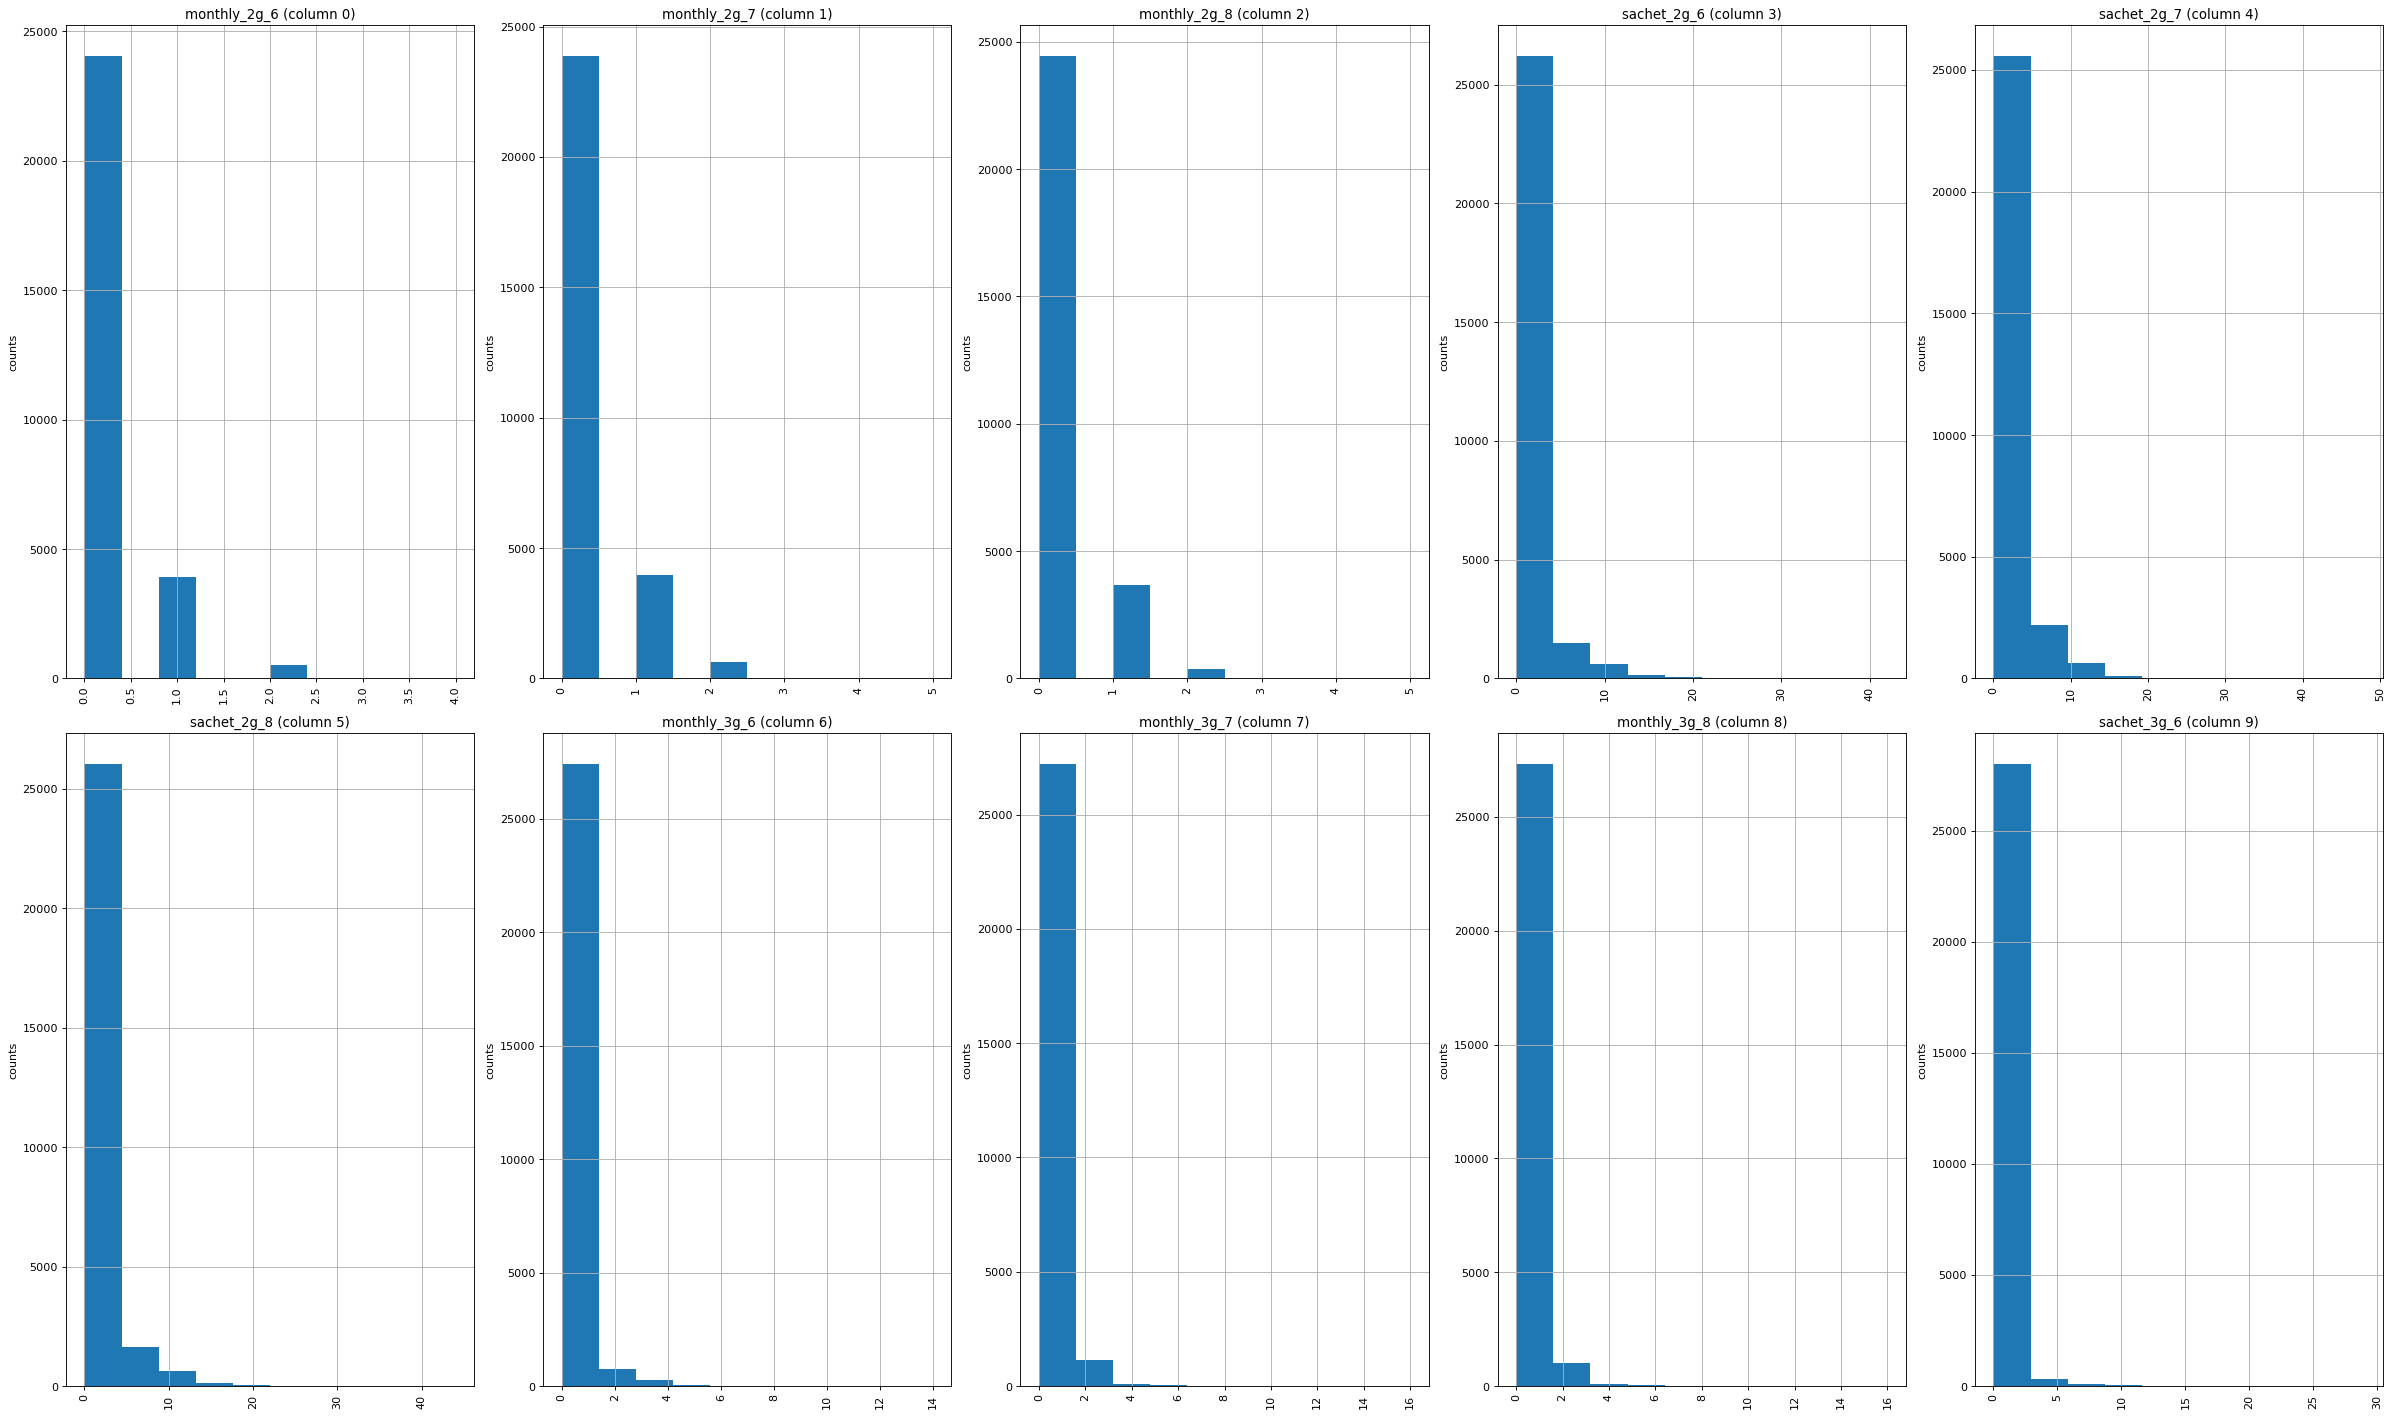

In [53]:
# call the function to plot the graphs
plotPerColumnDistribution(hig_val_cust, 10, 5)

#### Above are the distribution curves of High Value customers columns and their respective churn rate analysis.

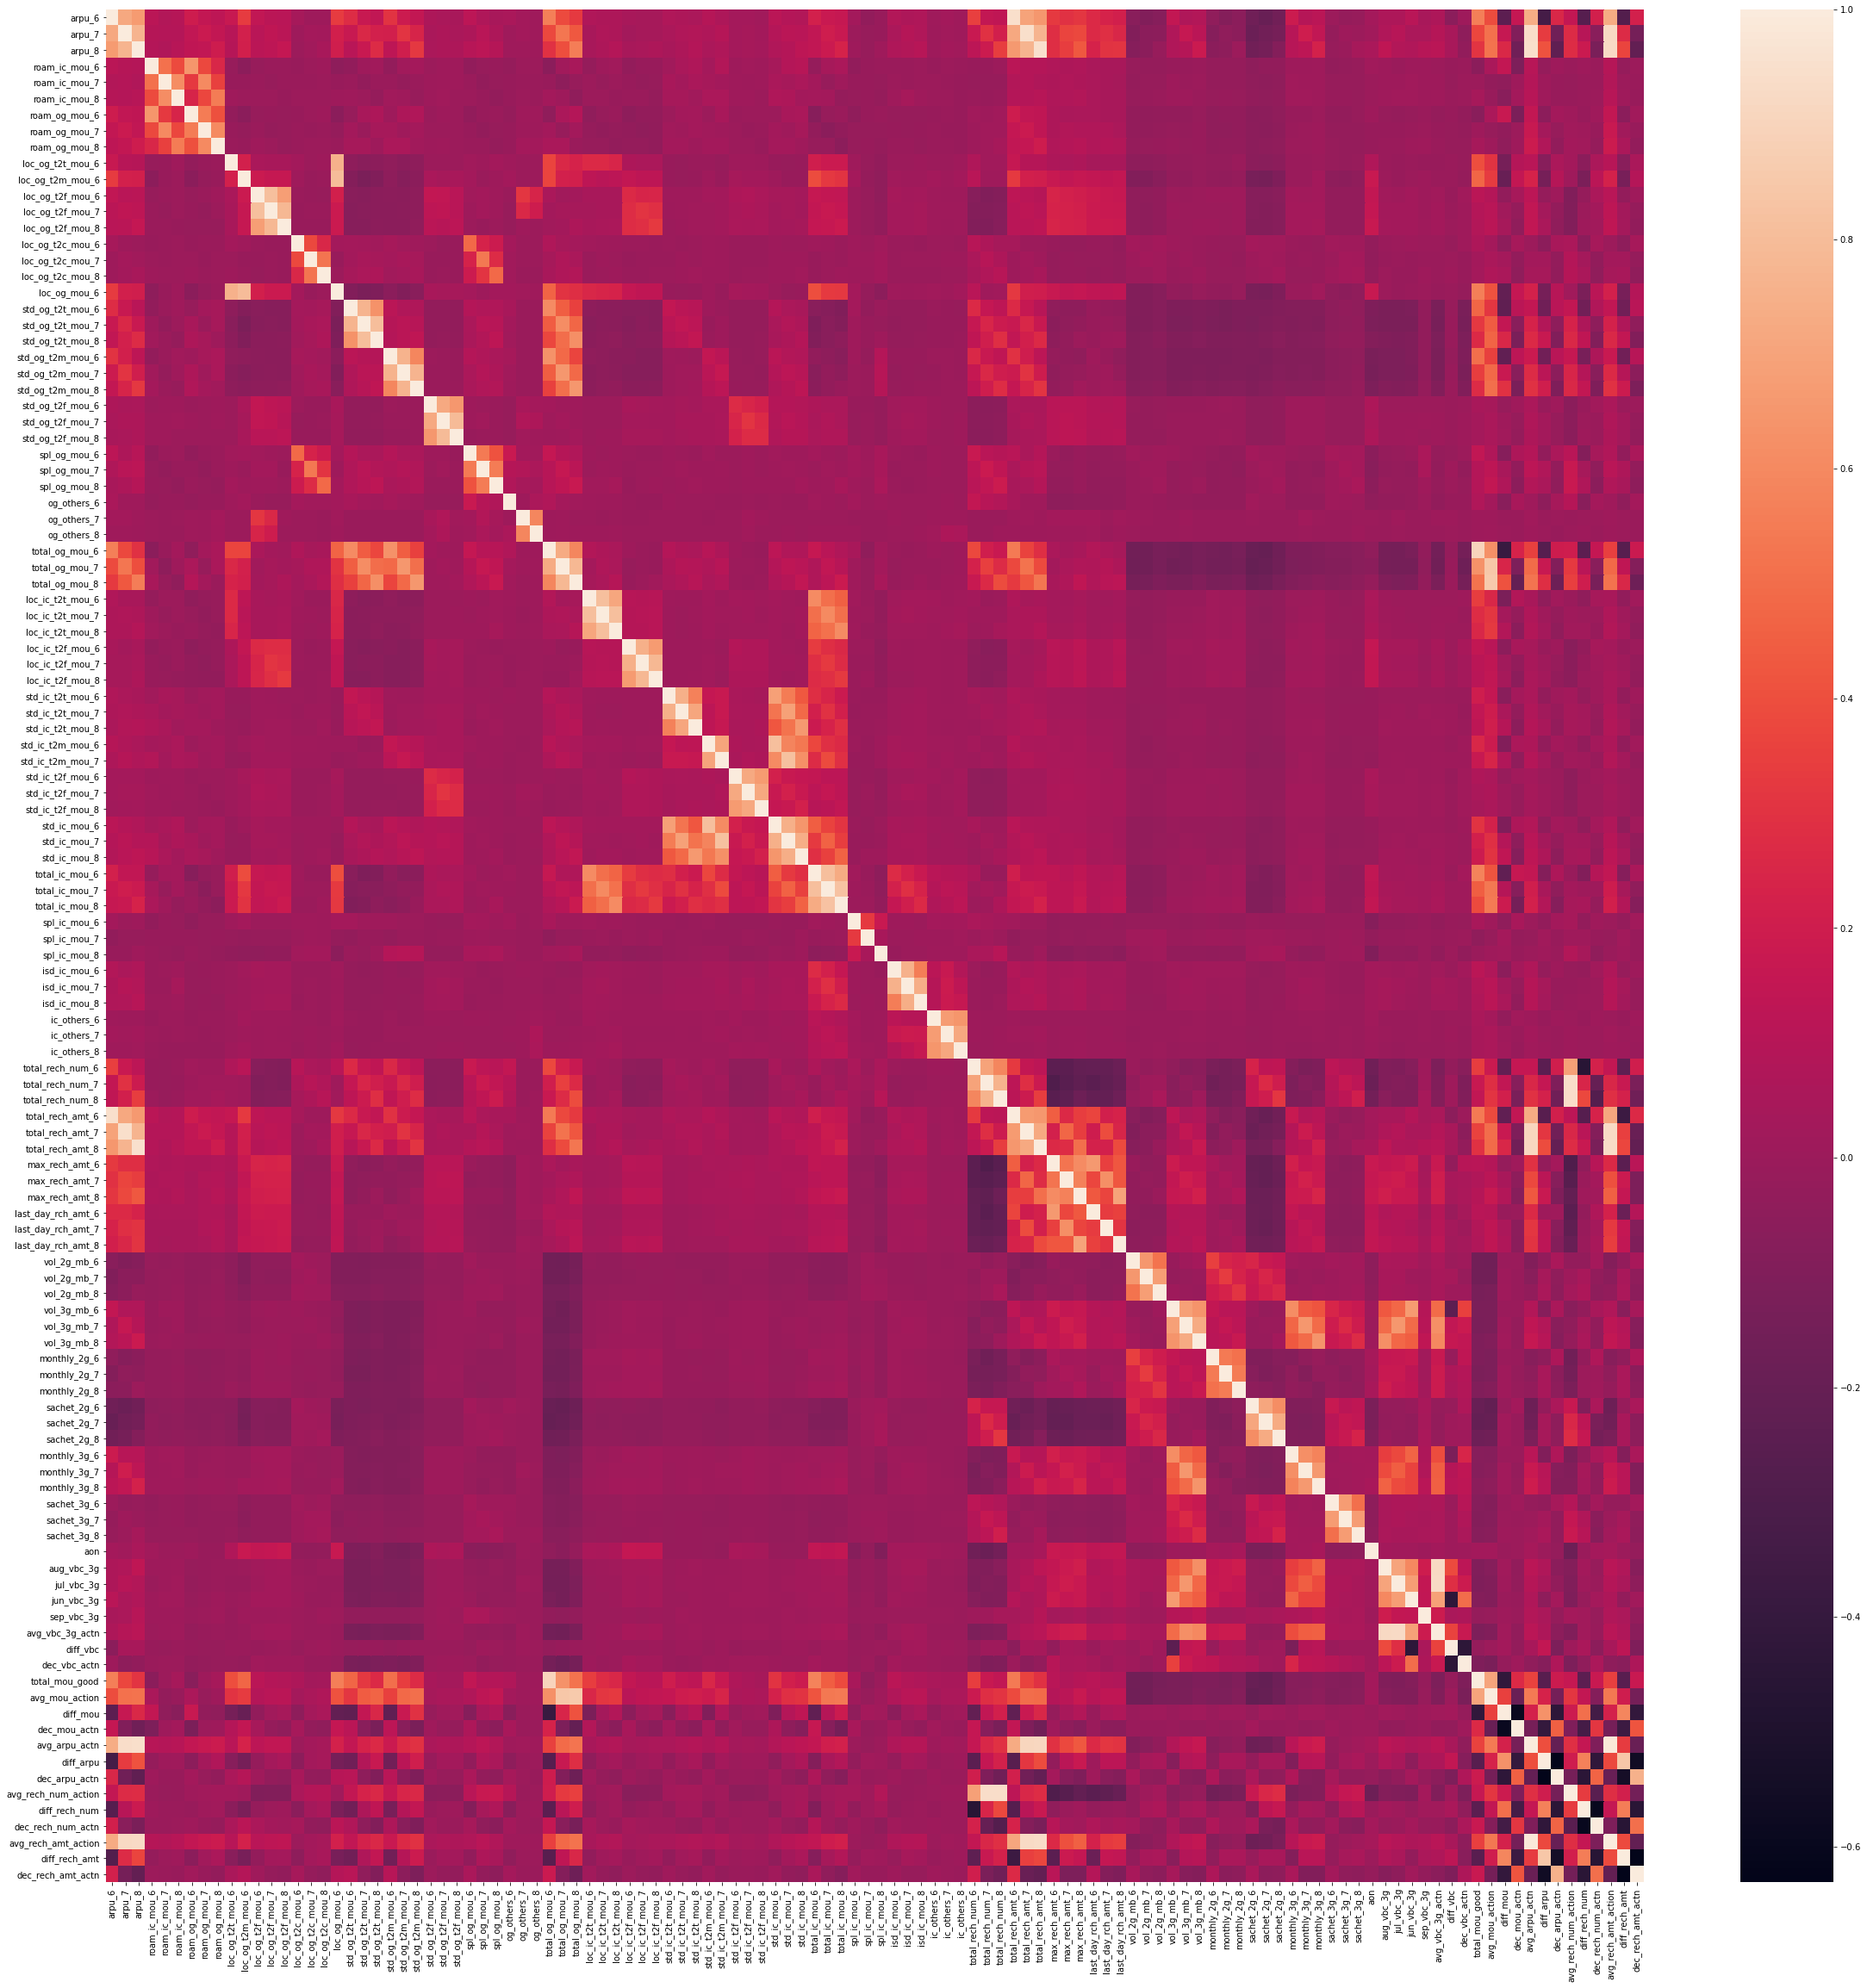

In [54]:
# Ploting correlation among all the columns
plt.figure(figsize=(40,40))
sns.heatmap(hig_val_cust.corr())
plt.show()

#### There are too many columns we are not able to get anyrhing insights from above plot but we can clearly see that there are still lot of columns wich are highly corelated to each other.

## Univariate analysis

#### Rate of churn on the basis whether the customer decreased her/his minutes of usage in action month

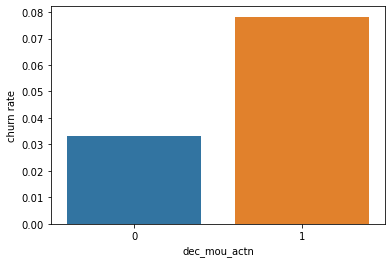

In [55]:
# Converting churn column to int in order to do aggfunc in the pivot table
hig_val_cust['churn'] = hig_val_cust['churn'].astype('int64')
sns.barplot((hig_val_cust.pivot_table(values='churn', index='dec_mou_actn', aggfunc='mean')).index,(hig_val_cust.pivot_table(values='churn', index='dec_mou_actn', aggfunc='mean')).churn)
plt.ylabel('churn rate')
plt.show()

#### Here we can see that churn rate is more of those customers whose MOU is decreased in action phase.

####  Rate of churn on the basis whether the customer decreased her/his number of recharge in action month

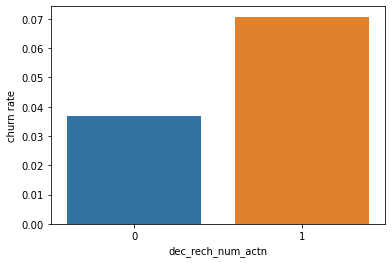

In [56]:
hig_val_cust['churn'] = hig_val_cust['churn'].astype('int64')
sns.barplot((hig_val_cust.pivot_table(values='churn', index='dec_rech_num_actn', aggfunc='mean')).index,(hig_val_cust.pivot_table(values='churn', index='dec_rech_num_actn', aggfunc='mean')).churn)
plt.ylabel('churn rate')
plt.show()

#### we can clearly see that churn rate is high of those customers whose number of recharge is decreased in the action month

#### Rate of churn on the basis whether the customer decreased her/his volume based cost in action month

In [57]:
sns.barplot((hig_val_cust.pivot_table(values='churn', index='dec_vbc_actn', aggfunc='mean')).index,(hig_val_cust.pivot_table(values='churn', index='dec_vbc_actn', aggfunc='mean')).churn)
plt.ylabel('churn rate')
plt.show()

#### The customers don't do the monthly recharge more when they are in the action phase, the churn rate is more for the customers, whose volume based cost in action month is increased

#### Rate of churn on the basis whether the customer decreased her/his amount of recharge in action month

In [58]:
sns.barplot((hig_val_cust.pivot_table(values='churn', index='dec_rech_amt_actn', aggfunc='mean')).index,(hig_val_cust.pivot_table(values='churn', index='dec_rech_amt_actn', aggfunc='mean')).churn)
plt.ylabel('churn rate')
plt.show()

#### we can clearly see rate of churn is high for those customers whose amount of recharge in the action phase is lesser than the amount in good phase

#### Finding average revenue per churn-customer and non-churn-customer in action phase 

In [59]:
# Creating churn dataframe
df_churn = hig_val_cust[hig_val_cust['churn'] == 1]
# Creating not churn dataframe
df_non_churn = hig_val_cust[hig_val_cust['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

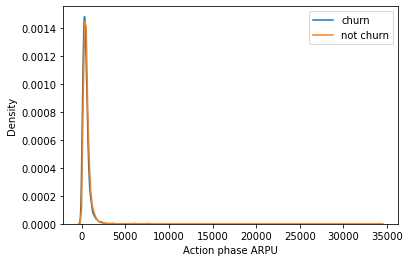

In [60]:
# Distribution plot
ax = sns.kdeplot(df_churn['avg_arpu_actn'],label='churn')
ax = sns.kdeplot(df_non_churn['avg_arpu_actn'],label='not churn')
ax.legend(labels=['churn','not churn'])
ax.set(xlabel='Action phase ARPU')

#### Average revenue per user for the not churned  and churned customers is mostly densed on the 0 to 2200. Both looks like having same density

#### Analysis of the minutes of usage MOU churn and not churn in the action phase

[Text(0.5, 0, 'Action phase MOU')]

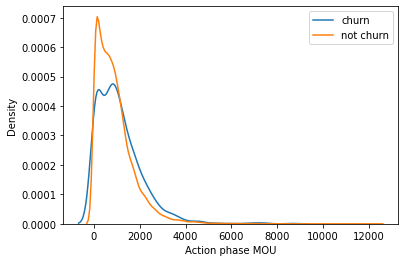

In [61]:
# Distribution plot
ax = sns.kdeplot(df_churn['total_mou_good'],label='churn')
ax = sns.kdeplot(df_non_churn['total_mou_good'],label='non churn')
ax.legend(labels=['churn','not churn'])
ax.set(xlabel='Action phase MOU')

#### churn customers is mostly populated on the 0 to 2500 range. Higher the Minutes of usage, lesser the churn probability

# Bivariate analysis

#### Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

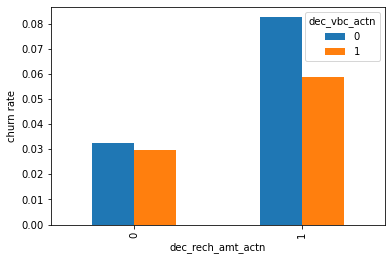

In [62]:
hig_val_cust.pivot_table(values='churn', index='dec_rech_amt_actn', columns='dec_vbc_actn', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

#### Churn rate is more for the customers, whose recharge amount is decreased

#### Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

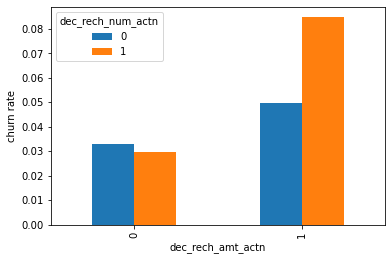

In [63]:
hig_val_cust.pivot_table(values='churn', index='dec_rech_amt_actn', columns='dec_rech_num_actn', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

#### In the action phase whose recharge amount as well as number of recharge have decreased those customers are having more churn rate

In [64]:
# Dropping unuseful columns 
hig_val_cust = hig_val_cust.drop(['total_mou_good','avg_mou_action','diff_mou','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','diff_arpu','avg_vbc_3g_actn','diff_vbc'], axis=1)

## Now we will move towards modeling

In [65]:
# Firstly we are copying the high value customer dataset for further modeling in to the another dataframe
hig_val_cust_1 = hig_val_cust

# Train test spit

In [66]:
#lets import train test split 
from sklearn.model_selection import train_test_split
X = hig_val_cust_1.drop(['churn'], axis=1)
y = hig_val_cust_1['churn']    
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)

# Scaling

In [67]:
# We need to perform scalling techniques before PCA
from sklearn.preprocessing import MinMaxScaler
# Instantiate the Scaler
scaler = MinMaxScaler()


#### before fitting the minmax scaler we need to get only numerical columns
#### Also we know that derived columns are already in the normalised form so for this columns we are not going to perform any scaling
'dec_mou_actn' ,
 'dec_rech_num_actn' ,
 'dec_rech_amt_actn' ,
 'dec_arpu_actn' , 
 'dec_vbc_actn' ,

In [68]:
# Taking all the columns in to a list 
scaling_col = X_train.columns.to_list()
# revoming above mentined columns from created list
scaling_col.remove('dec_mou_actn')
scaling_col.remove('dec_rech_num_actn')
scaling_col.remove('dec_rech_amt_actn')
scaling_col.remove('dec_arpu_actn')
scaling_col.remove('dec_vbc_actn')

In [69]:
# fit transform the scaler on train
X_train[scaling_col] = scaler.fit_transform(X_train[scaling_col])

In [70]:
# transform test using the already fit scaler
X_test[scaling_col] = scaler.transform(X_test[scaling_col])

In [71]:
X_train.head()

mobile_number    arpu_6    arpu_7    arpu_8  roam_ic_mou_6  \
48205  0.540146       0.069421  0.080921  0.054052  0.006987        
84772  0.609096       0.085386  0.069612  0.046891  0.000000        
77543  0.898306       0.075119  0.061622  0.027875  0.000000        
9678   0.148974       0.074200  0.061219  0.027423  0.000000        
38706  0.414599       0.094254  0.065791  0.041804  0.000000        

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
48205  0.001518       0.001142       0.003309       0.002395        
84772  0.027244       0.012912       0.000000       0.044820        
77543  0.000000       0.000000       0.000000       0.000000        
9678   0.000000       0.000000       0.000000       0.000000        
38706  0.000000       0.000000       0.000000       0.000000        

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  \
48205  0.003593       0.000000          0.000000          0.000000           
84772  0.007703       0.004957          0.017445          0.012831           
77543  0.000000       0.000210          0.001588          0.000921           
9678   0.000000       0.000000          0.000000          0.000000           
38706  0.000000       0.057773          0.062156          0.049719           

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
48205  0.000384          0.002865          0.000000          0.0                
84772  0.016365          0.026904          0.000000          0.0                
77543  0.000209          0.000711          0.019268          0.0                
9678   0.000000          0.000000          0.000000          0.0                
38706  0.004079          0.007270          0.039419          0.0                

       loc_og_t2c_mou_8  loc_og_mou_6  std_og_t2t_mou_6  std_og_t2t_mou_7  \
48205  0.001978          0.000000      0.0               0.049718           
84772  0.000000          0.012516      0.0               0.001175           
77543  0.000000          0.000959      0.0               0.000000           
9678   0.000000          0.000000      0.0               0.000000           
38706  0.000000          0.069380      0.0               0.000690           

       std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
48205  0.041448          0.000000          0.099578          0.076733           
84772  0.002337          0.002389          0.000649          0.001000           
77543  0.000000          0.000000          0.000000          0.000000           
9678   0.000000          0.000000          0.000000          0.000000           
38706  0.000000          0.001072          0.000610          0.000072           

       std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  spl_og_mou_6  \
48205  0.000000          0.000000          0.006483          0.000000       
84772  0.000000          0.001954          0.010386          0.018413       
77543  0.000000          0.000000          0.000000          0.005111       
9678   0.000000          0.000000          0.000000          0.000000       
38706  0.004932          0.000000          0.000000          0.010457       

       spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
48205  0.000284      0.007158      0.0          0.0          0.0           
84772  0.008121      0.037077      0.0          0.0          0.0           
77543  0.000000      0.000000      0.0          0.0          0.0           
9678   0.000000      0.000383      0.0          0.0          0.0           
38706  0.000000      0.000000      0.0          0.0          0.0           

       total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  \
48205  0.000000        0.168115        0.133589        0.000000           
84772  0.015686        0.020865        0.016575        0.010231           
77543  0.001447        0.000208        0.000048        0.000000           
9678   0.000000        0.000000        0.000022    

## Handling class imbalance using smote

In [72]:
#lets print the stats before sampling
print("counts of label '1':",sum(y_train==1))
print("counts of label '0':",sum(y_train==0))

counts of label '1': 1118
counts of label '0': 18834


In [73]:
#perform oversampling using smote
!pip install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
over = SMOTE(random_state=12)
X_train_smote, y_train_smote = over.fit_resample(X_train, y_train)

In [74]:
y_train_smote.value_counts()

0    18834
1    18834
Name: churn, dtype: int64

## First perform PCA on dataset before model building

In [75]:
# PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [76]:
# fitting PCA on the train dataset
pca.fit(X_train_smote)

PCA(random_state=42, svd_solver='randomized')

In [77]:
pca.explained_variance_ratio_[:50]

array([4.68009091e-01, 1.13135135e-01, 1.00573869e-01, 9.53789005e-02,
       6.77874944e-02, 3.75542710e-02, 2.92068910e-02, 1.30035060e-02,
       9.07454532e-03, 7.60639418e-03, 5.84178636e-03, 5.28180274e-03,
       4.47218079e-03, 4.26664440e-03, 3.40626527e-03, 2.46277845e-03,
       2.37536351e-03, 1.97411107e-03, 1.66163690e-03, 1.51109003e-03,
       1.31551492e-03, 1.29510334e-03, 1.24096936e-03, 1.13791788e-03,
       1.06613244e-03, 9.41263018e-04, 9.12511493e-04, 8.58189296e-04,
       8.14275526e-04, 7.58232068e-04, 7.34875995e-04, 7.23548529e-04,
       6.89489823e-04, 6.51535164e-04, 6.38573867e-04, 6.06037910e-04,
       5.63263841e-04, 5.28627379e-04, 5.20865562e-04, 4.76958021e-04,
       4.57641512e-04, 4.41410795e-04, 4.17620197e-04, 4.16178525e-04,
       3.61101124e-04, 3.19904502e-04, 3.05323928e-04, 2.90546532e-04,
       2.79767378e-04, 2.70977269e-04])

In [78]:
# components
pca.components_

array([[ 3.02464799e-03, -5.66516428e-03,  2.71852649e-03, ...,
         1.72048014e-02, -4.47955245e-01, -5.42883952e-01],
       [ 1.74602212e-02,  1.63978617e-03,  3.21684674e-04, ...,
        -1.52428737e-02,  5.56914452e-01,  1.56652325e-01],
       [-1.19350938e-01, -1.19619685e-03, -2.46805849e-03, ...,
        -8.97012865e-03, -1.79727042e-01,  4.07143908e-02],
       ...,
       [ 4.40633245e-08,  3.78549504e-06, -1.23359020e-06, ...,
         5.73427747e-08,  1.84807902e-08,  4.00274708e-08],
       [ 1.17531100e-16, -7.89867691e-17,  4.31913014e-01, ...,
         9.04902308e-02,  3.38542128e-17,  2.44324960e-16],
       [ 0.00000000e+00, -9.40046482e-16, -5.15072110e-02, ...,
         7.58804593e-01,  3.62902796e-17,  1.25144036e-16]])

In [79]:
#lets draw screeplot in between cumulative variance and number of components
%matplotlib inline
fig = plt.figure(figsize = (9,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Plot shows almost 30 components are enough to explain close to 95% variance

In [80]:
# We are going with the incremental PCA for better performance

new_pca = IncrementalPCA(n_components=30)


In [81]:
# Fitting incremental PCA to to train

X_train_PC = new_pca.fit_transform(X_train_smote)
X_train_PC.shape

(37668, 30)

In [82]:
# Transformation on the test set
X_test_PC = new_pca.transform(X_test)
X_test_PC.shape

(8552, 30)

# Performing logistic regression with PCA

In [83]:
# Now we will create correlation matrix for the principal components
corrmat = np.corrcoef(X_train_PC.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.014640334629757785 , min corr:  -0.008194781193617924


In [84]:
learner_PCA = LogisticRegression(class_weight='balanced')
learner_PCA.fit(X_train_PC,y_train_smote)

LogisticRegression(class_weight='balanced')

In [85]:
# We are going to predict on training set
data_train_pred = learner_PCA.predict(X_train_PC)
data_train_pred_prob = learner_PCA.predict_proba(X_train_PC)[:,1]

In [86]:
#scores
print ("Accuracy :",metrics.roc_auc_score(y_train_smote, data_train_pred))
print ("Sensitivity :",metrics.recall_score(y_train_smote, data_train_pred))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smote, data_train_pred_prob))

Accuracy : 0.8015291494106402
Sensitivity : 0.8167675480513964
AUC Score (Train): 0.8765202981929758


#### We need to predict true positive records of customers who are going to churn in upcoming month so we are focusing more only on sensitivity

In [87]:
# Prediction on the test set
y_test_pred = learner_PCA.predict(X_test_PC)

In [88]:
confusion_metrix = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion_metrix[1,1] 
TN = confusion_metrix[0,0] 
FP = confusion_metrix[0,1] 
FN = confusion_metrix[1,0] 

In [89]:
# Accuracy score 
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity score
print("Sensitivity:-",TP / float(TP+FN))

# Specificity score
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7868334892422825
Sensitivity:- 0.7803347280334728
Specificity:- 0.7872182313599208


### What we have concluded from above model 

- Train 
      Accuracy : 0.8015291494106402
      Sensitivity : 0.8167675480513964
      AUC Score (Train): 0.8765202981929758
    
    
- Test    
      Accuracy:- 0.7868334892422825
      Sensitivity:- 0.7803347280334728
      Specificity:- 0.7872182313599208

#### AS we can see above for Accuracy and Sensitivity Overall, the model is performing well in the test set, what it had learnt from the train set.


In [90]:
# now check with probability cutoff 0.5
y_train_pred = learner_PCA.predict_proba(X_train_PC)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_smote, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0  0      0.272087    0        
1  0      0.336312    0        
2  0      0.731326    1        
3  0      0.591416    1        
4  0      0.144323    0

In [91]:
# we will define function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

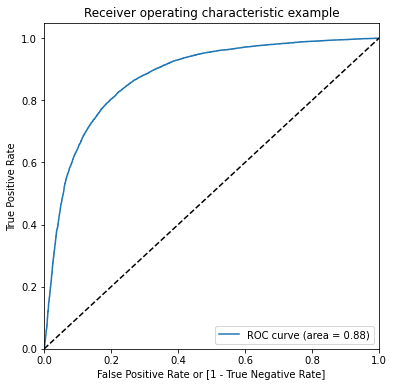

(array([0.        , 0.        , 0.        , ..., 0.99989381, 0.9999469 ,
        1.        ]),
 array([0.00000000e+00, 5.30954656e-05, 1.06190931e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99982653e+00, 9.99826530e-01, 9.99646668e-01, ...,
        5.41780652e-07, 4.85668610e-07, 4.59009261e-11]))

In [92]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

Arround 88% area is under the curve

In [93]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob))

'0.88'

In [94]:
# Let's create columns with different probability cutoffs 
numb = [float(x)/10 for x in range(10)]
for i in numb:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0  0      0.272087    0          1    1    1    0    0    0    0    0    0     
1  0      0.336312    0          1    1    1    1    0    0    0    0    0     
2  0      0.731326    1          1    1    1    1    1    1    1    1    0     
3  0      0.591416    1          1    1    1    1    1    1    0    0    0     
4  0      0.144323    0          1    1    0    0    0    0    0    0    0     

   0.9  
0  0    
1  0    
2  0    
3  0    
4  0

In [95]:
# let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.500000  1.000000  0.000000
0.1  0.1   0.626580  0.984496  0.268663
0.2  0.2   0.704816  0.964426  0.445205
0.3  0.3   0.760486  0.935648  0.585324
0.4  0.4   0.789344  0.886110  0.692577
0.5  0.5   0.801529  0.816768  0.786291
0.6  0.6   0.793299  0.726824  0.859775
0.7  0.7   0.759239  0.602103  0.916375
0.8  0.8   0.689843  0.423914  0.955771
0.9  0.9   0.579165  0.175109  0.983222


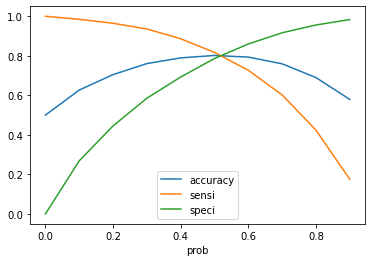

In [96]:
# ploting  accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

0.45 is the optimum point to take it as a cutoff probability.

In [97]:
# Now we need to apply cutoff probability
#apply cutoff probability
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0  0      0.272087    0          1    1    1    0    0    0    0    0    0     
1  0      0.336312    0          1    1    1    1    0    0    0    0    0     
2  0      0.731326    1          1    1    1    1    1    1    1    1    0     
3  0      0.591416    1          1    1    1    1    1    1    0    0    0     
4  0      0.144323    0          1    1    0    0    0    0    0    0    0     

   0.9  final_predicted  
0  0    0                
1  0    0                
2  0    1                
3  0    1                
4  0    0

In [98]:
# prediction on train dataset with optimal cutoff probability
y_train_pred = learner_PCA.predict_proba(X_train_PC)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_smote, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0  0      0.272087    0        
1  0      0.336312    0        
2  0      0.731326    1        
3  0      0.591416    1        
4  0      0.144323    0

In [99]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[14006,  4828],
       [ 2728, 16106]], dtype=int64)

In [100]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('Sensitivity :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.799405330784751
precision score: 0.7693704022164899
Sensitivity : 0.8551555697143464
Specificity: 0.7436550918551555
False Positive Rate: 0.25634490814484445
Positive predictive value: 0.7693704022164899
Negative Predictive value: 0.8369786064300228


In [101]:
#lets predict on test datset with optimal cutoff obtained earlier
y_test_pred = learner_PCA.predict_proba(X_test_PC)[:,1]
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final['Churn_Prob'] = y_test_pred
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_test_pred_final.head()

Churn  Churn_Prob  predicted
23592  0      0.117357    0        
29640  0      0.265646    0        
11357  0      0.498167    1        
37103  0      0.287649    0        
17466  0      0.105140    0

### cores of test dataset

In [102]:
#print all scores
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [103]:
print("Roc_auc_score :",metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print('precision score :',(metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final.predicted)))
print('Sensitivity :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.7806207849359948
precision score : 0.15868506493506493
Sensitivity : 0.8179916317991632
Specificity: 0.7432499380728264
False Positive Rate: 0.25675006192717365
Positive predictive value: 0.15868506493506493
Negative Predictive value: 0.9857095926412615


#### Again lets check

- Train
       
      Roc_auc_score : 0.799405330784751
      precision score: 0.7693704022164899
      Sensitivity : 0.8551555697143464
      Specificity: 0.7436550918551555
      
        
- Test
      Roc_auc_score : 0.7806207849359948
      precision score : 0.15868506493506493
      Sensitivity : 0.8179916317991632
      Specificity: 0.7432499380728264
      

    
      

# Decision tree with PCA

In [104]:
# Create  parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate grid 
d_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = d_tree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid 
grid_search.fit(X_train_PC,y_train_smote)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [105]:
# CV results
cv_result = pd.DataFrame(grid_search.cv_results_)
cv_result

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0  0.569090       0.015155      0.002401         0.001960         
1  0.586987       0.016721      0.003801         0.000400         
2  0.538514       0.021060      0.006127         0.004768         
3  0.593563       0.031839      0.001601         0.001960         
4  0.930762       0.057781      0.003927         0.006056         
5  0.931478       0.030267      0.003200         0.001600         
6  0.859109       0.049068      0.000000         0.000000         
7  0.819438       0.011739      0.003126         0.006253         

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0  5               50                     50                       
1  5               50                     100                      
2  5               100                    50                       
3  5               100                    100                      
4  10              50                     50                       
5  10              50                     100                      
6  10              100                    50                       
7  10              100                    100                      

                                                                 params  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}      
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}     
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}     
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}    
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}     
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}    
6  {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}    
7  {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0  0.735864           0.778073           0.745155           0.786776            
1  0.735864           0.778073           0.745155           0.786776            
2  0.736130           0.782586           0.755243           0.783324            
3  0.736130           0.782586           0.755243           0.783324            
4  0.808601           0.851606           0.850810           0.827138            
5  0.808601           0.852137           0.851341           0.827138            
6  0.789222           0.835678           0.812848           0.807488            
7  0.789222           0.835678           0.812848           0.807488            

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0  0.768516           0.762877         0.019379        7                
1  0.768516           0.762877         0.019379        7                
2  0.764534           0.764363         0.017731        5                
3  0.764534           0.764363         0.017731        5                
4  0.835147           0.834660         0.016024        2                
5  0.835147           0.834873         0.016244        1                
6  0.797452           0.808538         0.015826        3                
7  0.797452           0.808538         0.015826        3

In [106]:
# Optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.8348726911359952
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [107]:
# Appying best parameters

data_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

data_pca_model.fit(X_train_PC, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [108]:
# Prediction on Train

y_train_pred = data_pca_model.predict(X_train_PC)

In [109]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0]

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))


[[14917  3917]
 [ 2437 16397]]
Sensitivity:- 0.8706063502176914
Specificity:- 0.7920250610597855
Accuracy:- 0.8313157056387385


In [110]:
# Prediction on test

y_test_pred = data_pca_model.predict(X_test_PC)

In [111]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6248 1826]
 [ 165  313]]


In [112]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1]
FN = confusion[1,0]

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7671889616463985
Sensitivity:- 0.6548117154811716
Specificity:- 0.773841961852861


## Conclusion on above decision tree

- Train
        Sensitivity:- 0.8706063502176914
        Specificity:- 0.7920250610597855
        Accuracy:- 0.8313157056387385
            
- Test
        Accuracy:- 0.7671889616463985
        Sensitivity:- 0.6548117154811716
        Specificity:- 0.773841961852861


# Model with random forest

In [113]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_PC, y_train_smote)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [114]:
# optimal accuracy score and hyperparameters
print('accuracy of',grid_search.best_score_,'using',grid_search.best_params_)


accuracy of 0.7905118402888393 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}


In [115]:
# Building model with above parameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=150,
                             max_features=20,
                             n_estimators=300)
# Fitting model
rfc_model.fit(X_train_PC, y_train_smote)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=150, n_estimators=300)

In [116]:
# Predictions on the train
y_train_pred = rfc_model.predict(X_train_PC)


In [117]:
# Confusion metrix

confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))
print("Sensitivity:-",TP / float(TP+FN))
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7848837209302325
Sensitivity:- 0.7693002017627695
Specificity:- 0.8004672400976957


In [118]:
# Prediction on test
y_test_pred = rfc_model.predict(X_test_PC)

In [119]:
# Again Checking confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))
print("Sensitivity:-",TP / float(TP+FN))
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7917446211412535
Sensitivity:- 0.6861924686192469
Specificity:- 0.797993559573941


# Lets Compare performance of train and test



- Train
       Accuracy:- 0.7859190825103536
       Sensitivity:- 0.7730168843580758
       Specificity:- 0.7988212806626314
- Test
      Accuracy:- 0.7671889616463985
      Sensitivity:- 0.6548117154811716
      Specificity:- 0.773841961852861
         
      

# Logistic regression without PCA


In [120]:
# Adding the constant
logm1 = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37668
Model:                            GLM   Df Residuals:                    37561
Model Family:                Binomial   Df Model:                          106
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15482.
Date:                Wed, 04 May 2022   Deviance:                       30965.
Time:                        20:32:16   Pearson chi2:                 3.02e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.4861      0.412     -3.607      0.000      -2.294      -0.679
mobile_number           0.0076      0.052      0.146      0.884      -0.094       0.109
arpu_6                  0.2589      4.541      0.057      0.955      -8.642       9.160
arpu_7                 21.7886      5.041      4.323      0.000      11.909      31.668
arpu_8                 41.8352      5.583      7.493      0.000      30.893      52.777
roam_ic_mou_6           1.0961      0.830      1.321      0.187      -0.530       2.722
roam_ic_mou_7           4.7211      1.473      3.205      0.001       1.834       7.608
roam_ic_mou_8          -0.9345      1.083     -0.863      0.388      -3.057       1.188
roam_og_mou_6          -0.1696      0.847     -0.200      0.841      -1.830       1.491
roam_og_mou_7           2.5610      0.560      4.574      0.000       1.464       3.658
roam_og_mou_8           5.6913      0.858      6.635      0.000       4.010       7.373
loc_og_t2t_mou_6     1.052e+05   1.77e+04      5.942      0.000    7.05e+04     1.4e+05
loc_og_t2m_mou_6     7.734e+04    1.3e+04      5.941      0.000    5.18e+04    1.03e+05
loc_og_t2f_mou_6     2.399e+04   4034.895      5.945      0.000    1.61e+04    3.19e+04
loc_og_t2f_mou_7      -34.2650      3.089    -11.091      0.000     -40.320     -28.210
loc_og_t2f_mou_8        9.1560      1.889      4.848      0.000       5.454      12.858
loc_og_t2c_mou_6       -5.6126      1.003     -5.595      0.000      -7.579      -3.646
loc_og_t2c_mou_7       -2.4148      1.792     -1.348      0.178      -5.927       1.097
loc_og_t2c_mou_8        4.2732      1.133      3.771      0.000       2.052       6.494
loc_og_mou_6        -1.741e+05   2.93e+04     -5.942      0.000   -2.31e+05   -1.17e+05
std_og_t2t_mou_6      -10.8765      7.116     -1.528      0.126     -24.824       3.071
std_og_t2t_mou_7       -6.7624      1.303     -5.189      0.000      -9.317      -4.208
std_og_t2t_mou_8       18.1510      1.634     11.110      0.000      14.949      21.353
std_og_t2m_mou_6      -10.7815      6.213     -1.735      0.083     -22.959       1.396
std_og_t2m_mou_7       -4.5021      1.484     -3.034      0.002      -7.410      -1.594
std_og_t2m_mou_8       26.0421      2.786      9.347      0.000      20.581      31.503
std_og_t2f_mou_6       -0.9911      1.486     -0.667      0.505      -3.904       1.921
std_og_t2f_mou_7        1.4801      1.328      1.115      0.265      -1.123       4.083
std_og_t2f_mou_8       -4.5828      1.388     -3.302      0.001      -7.303      -1.863
spl_og_mou_6           -1.5280      1.615     -0.946      0.344      -4.694       1.638
spl_og_mou_7            2.6912      1.769      1.521      0.128      -0.776       6.158
spl_og_mou_8           -6.2210      1.454     -4.279      0.000      -9.070      -3.372
og_

Some features have positive coefficients and few have negative. so we will use RFE to select auto features

In [121]:
# Intantiate the logistic regression
logreg = LogisticRegression()


## Feature Selection Using RFE

In [122]:
from sklearn.feature_selection import RFE
# running RFE with 16 variables as output
rfe = RFE(logreg, n_features_to_select=16)            
rfe = rfe.fit(X_train_smote, y_train_smote)

In [123]:
list(zip(X_train_smote.columns, rfe.support_, rfe.ranking_))

[('mobile_number', False, 93),
 ('arpu_6', False, 36),
 ('arpu_7', False, 13),
 ('arpu_8', False, 29),
 ('roam_ic_mou_6', False, 53),
 ('roam_ic_mou_7', False, 23),
 ('roam_ic_mou_8', False, 44),
 ('roam_og_mou_6', False, 92),
 ('roam_og_mou_7', False, 7),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 68),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2f_mou_6', False, 88),
 ('loc_og_t2f_mou_7', False, 14),
 ('loc_og_t2f_mou_8', False, 27),
 ('loc_og_t2c_mou_6', False, 16),
 ('loc_og_t2c_mou_7', False, 90),
 ('loc_og_t2c_mou_8', False, 50),
 ('loc_og_mou_6', False, 60),
 ('std_og_t2t_mou_6', False, 43),
 ('std_og_t2t_mou_7', False, 5),
 ('std_og_t2t_mou_8', False, 63),
 ('std_og_t2m_mou_6', False, 69),
 ('std_og_t2m_mou_7', False, 4),
 ('std_og_t2m_mou_8', False, 33),
 ('std_og_t2f_mou_6', False, 73),
 ('std_og_t2f_mou_7', False, 85),
 ('std_og_t2f_mou_8', False, 11),
 ('spl_og_mou_6', False, 55),
 ('spl_og_mou_7', False, 56),
 ('spl_og_mou_8', False, 32),
 ('og_others_6', Fal

In [124]:
col = X_train_smote.columns[rfe.support_]

# Assessing the model with StatsModels

In [125]:
X_train_sm = sm.add_constant(X_train_smote[col])
logm2 = sm.GLM(y_train_smote,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37668
Model:                            GLM   Df Residuals:                    37651
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16672.
Date:                Wed, 04 May 2022   Deviance:                       33345.
Time:                        20:33:20   Pearson chi2:                 1.60e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8997      0.034     26.527      0.000       0.833       0.966
roam_og_mou_8         10.3327      0.591     17.477      0.000       9.174      11.491
loc_og_t2m_mou_6      -8.1766      0.472    -17.330      0.000      -9.101      -7.252
total_og_mou_7        10.8572      0.463     23.464      0.000       9.950      11.764
total_og_mou_8       -19.5153      0.743    -26.276      0.000     -20.971     -18.060
loc_ic_t2t_mou_8      -7.6731      1.413     -5.432      0.000     -10.442      -4.905
total_ic_mou_6         8.7142      0.577     15.094      0.000       7.583       9.846
total_ic_mou_8       -22.6319      0.814    -27.816      0.000     -24.227     -21.037
spl_ic_mou_8         -14.2925      1.239    -11.540      0.000     -16.720     -11.865
total_rech_num_7       5.9447      0.373     15.924      0.000       5.213       6.676
total_rech_num_8     -13.9768      0.691    -20.237      0.000     -15.330     -12.623
total_rech_amt_6      15.5938      1.272     12.258      0.000      13.100      18.087
last_day_rch_amt_8   -12.4799      0.723    -17.253      0.000     -13.898     -11.062
monthly_2g_8          -9.7100      0.330    -29.385      0.000     -10.358      -9.062
sachet_2g_8           -9.4384      0.417    -22.613      0.000     -10.257      -8.620
monthly_3g_8         -11.0196      0.461    -23.917      0.000     -11.923     -10.117
sep_vbc_3g           -25.7616      2.069    -12.452      0.000     -29.817     -21.707
======================================================================================
"""

# Checking highly correlated features with VIF

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[col].values, i) for i in range(X_train_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9   total_rech_num_8    6.30
8   total_rech_num_7    6.12
2   total_og_mou_7      5.20
3   total_og_mou_8      4.56
6   total_ic_mou_8      4.15
5   total_ic_mou_6      3.73
10  total_rech_amt_6    3.22
1   loc_og_t2m_mou_6    1.93
4   loc_ic_t2t_mou_8    1.88
11  last_day_rch_amt_8  1.52
13  sachet_2g_8         1.37
0   roam_og_mou_8       1.19
14  monthly_3g_8        1.16
12  monthly_2g_8        1.10
15  sep_vbc_3g          1.04
7   spl_ic_mou_8        1.03

We are going to remove "total_rech_num_8" this column as it is having high VIF value that is above 5

In [127]:
col = col.drop('total_rech_num_8', 1)
col

Index(['roam_og_mou_8', 'loc_og_t2m_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_7', 'total_rech_amt_6', 'last_day_rch_amt_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g'],
      dtype='object')

In [128]:
# Again buding third model
X_train_sm = sm.add_constant(X_train_smote[col])
logm3 = sm.GLM(y_train_smote,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37668
Model:                            GLM   Df Residuals:                    37652
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16896.
Date:                Wed, 04 May 2022   Deviance:                       33793.
Time:                        20:33:20   Pearson chi2:                 4.99e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9296      0.033     27.767      0.000       0.864       0.995
roam_og_mou_8          8.7234      0.582     14.997      0.000       7.583       9.863
loc_og_t2m_mou_6      -8.1543      0.467    -17.454      0.000      -9.070      -7.239
total_og_mou_7        14.1324      0.443     31.891      0.000      13.264      15.001
total_og_mou_8       -27.3046      0.672    -40.645      0.000     -28.621     -25.988
loc_ic_t2t_mou_8      -7.4497      1.409     -5.289      0.000     -10.210      -4.689
total_ic_mou_6         9.0478      0.569     15.915      0.000       7.934      10.162
total_ic_mou_8       -23.5129      0.812    -28.965      0.000     -25.104     -21.922
spl_ic_mou_8         -16.1899      1.240    -13.060      0.000     -18.620     -13.760
total_rech_num_7       0.2950      0.235      1.256      0.209      -0.165       0.755
total_rech_amt_6      13.8147      1.261     10.958      0.000      11.344      16.286
last_day_rch_amt_8   -11.1515      0.709    -15.728      0.000     -12.541      -9.762
monthly_2g_8         -10.0057      0.331    -30.239      0.000     -10.654      -9.357
sachet_2g_8          -11.6493      0.399    -29.201      0.000     -12.431     -10.867
monthly_3g_8         -11.4592      0.457    -25.050      0.000     -12.356     -10.563
sep_vbc_3g           -27.2022      2.072    -13.125      0.000     -31.264     -23.140
======================================================================================
"""

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[col].values, i) for i in range(X_train_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2   total_og_mou_7      4.52
6   total_ic_mou_8      4.13
5   total_ic_mou_6      3.72
3   total_og_mou_8      3.24
9   total_rech_amt_6    3.22
8   total_rech_num_7    2.85
1   loc_og_t2m_mou_6    1.93
4   loc_ic_t2t_mou_8    1.88
10  last_day_rch_amt_8  1.51
12  sachet_2g_8         1.22
0   roam_og_mou_8       1.16
13  monthly_3g_8        1.15
11  monthly_2g_8        1.09
14  sep_vbc_3g          1.04
7   spl_ic_mou_8        1.03

here we found all features are having <5 VIF value but 20% P value for "total_rech_num_7" so we will drop this columm and again check with new model

In [130]:
col = col.drop('total_rech_num_7', 1)
col

Index(['roam_og_mou_8', 'loc_og_t2m_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_amt_6', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sep_vbc_3g'],
      dtype='object')

In [131]:
# Again buding fourth model
X_train_sm = sm.add_constant(X_train_smote[col])
logm4 = sm.GLM(y_train_smote,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37668
Model:                            GLM   Df Residuals:                    37653
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16897.
Date:                Wed, 04 May 2022   Deviance:                       33794.
Time:                        20:33:21   Pearson chi2:                 4.84e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9483      0.030     31.637      0.000       0.890       1.007
roam_og_mou_8          8.7251      0.581     15.012      0.000       7.586       9.864
loc_og_t2m_mou_6      -8.1747      0.466    -17.534      0.000      -9.088      -7.261
total_og_mou_7        14.2821      0.427     33.421      0.000      13.445      15.120
total_og_mou_8       -27.3069      0.672    -40.639      0.000     -28.624     -25.990
loc_ic_t2t_mou_8      -7.5057      1.408     -5.329      0.000     -10.266      -4.745
total_ic_mou_6         9.0335      0.568     15.899      0.000       7.920      10.147
total_ic_mou_8       -23.4601      0.810    -28.962      0.000     -25.048     -21.872
spl_ic_mou_8         -16.1698      1.240    -13.042      0.000     -18.600     -13.740
total_rech_amt_6      13.8252      1.261     10.966      0.000      11.354      16.296
last_day_rch_amt_8   -11.2989      0.700    -16.136      0.000     -12.671      -9.926
monthly_2g_8         -10.0223      0.331    -30.307      0.000     -10.670      -9.374
sachet_2g_8          -11.5679      0.394    -29.390      0.000     -12.339     -10.796
monthly_3g_8         -11.4808      0.457    -25.103      0.000     -12.377     -10.584
sep_vbc_3g           -27.1997      2.071    -13.132      0.000     -31.259     -23.140
======================================================================================
"""

In [132]:
# Again Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[col].values, i) for i in range(X_train_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6   total_ic_mou_8      4.13
2   total_og_mou_7      3.81
5   total_ic_mou_6      3.70
3   total_og_mou_8      3.24
8   total_rech_amt_6    3.06
1   loc_og_t2m_mou_6    1.93
4   loc_ic_t2t_mou_8    1.88
9   last_day_rch_amt_8  1.49
0   roam_og_mou_8       1.15
12  monthly_3g_8        1.15
10  monthly_2g_8        1.09
11  sachet_2g_8         1.07
13  sep_vbc_3g          1.04
7   spl_ic_mou_8        1.03

Now variables are significant and there is no multicollinearity 

In [133]:
# checking the model performance on training dataset

y_train_pred_ = res.predict(X_train_sm)
y_train_pred_.head()

0    0.047908
1    0.217446
2    0.743047
3    0.733830
4    0.245120
dtype: float64

In [134]:
y_train_pred_final = pd.DataFrame({'churn':y_train_smote.values, 'churn_prob':y_train_pred_.values})
y_train_pred_final['Cust_ID'] = y_train_pred_final.index

y_train_pred_final.head()

churn  churn_prob  Cust_ID
0  0      0.047908    0      
1  0      0.217446    1      
2  0      0.743047    2      
3  0      0.733830    3      
4  0      0.245120    4

### Optimum Probability Cut Off

In [135]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

churn  churn_prob  Cust_ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0  0      0.047908    0        1    0    0    0    0    0    0    0    0     
1  0      0.217446    1        1    1    1    0    0    0    0    0    0     
2  0      0.743047    2        1    1    1    1    1    1    1    1    0     
3  0      0.733830    3        1    1    1    1    1    1    1    1    0     
4  0      0.245120    4        1    1    1    0    0    0    0    0    0     

   0.9  
0  0    
1  0    
2  0    
3  0    
4  0

In [136]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.500000  1.000000  0.000000
0.1  0.1   0.650977  0.981470  0.320484
0.2  0.2   0.719868  0.957471  0.482266
0.3  0.3   0.764044  0.926834  0.601253
0.4  0.4   0.791282  0.888181  0.694382
0.5  0.5   0.808617  0.833705  0.783530
0.6  0.6   0.806281  0.757248  0.855315
0.7  0.7   0.778247  0.642137  0.914357
0.8  0.8   0.704842  0.456568  0.953117
0.9  0.9   0.588802  0.198152  0.979452


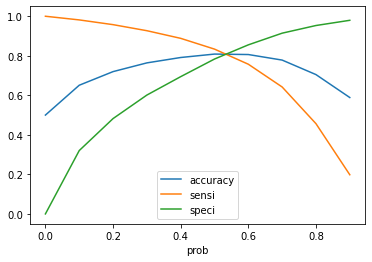

In [137]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### AS per above graph optimum probability cutoff is 0.55 but our main goal is to get the best sensitivity so we are choosing optimum probability cutoff as 0.5

In [138]:
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

churn  churn_prob  Cust_ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0  0      0.047908    0        1    0    0    0    0    0    0    0    0     
1  0      0.217446    1        1    1    1    0    0    0    0    0    0     
2  0      0.743047    2        1    1    1    1    1    1    1    1    0     
3  0      0.733830    3        1    1    1    1    1    1    1    1    0     
4  0      0.245120    4        1    1    1    0    0    0    0    0    0     

   0.9  final_predicted  
0  0    0                
1  0    0                
2  0    1                
3  0    1                
4  0    0

In [139]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )

TP = confusion2[1,1]
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]


In [140]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.833705001592864

In [141]:
# Let us calculate specificity
TN / float(TN+FP)

0.7835297865562281

In [142]:
# Accuracy 
metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['final_predicted'])

0.808617394074546

In [143]:
# ROC Curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

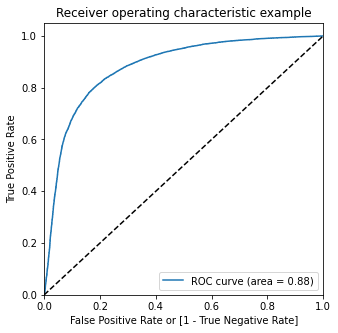

In [144]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

## Testing in test dataset

In [145]:
X_test_reg = X_test.copy()
X_test_reg = X_test_reg[col]

In [146]:
# Adding constant
X_test_sm = sm.add_constant(X_test_reg)

In [147]:
# Predict on the test set
y_test_pred = res.predict(X_test_sm)

In [148]:
# Converted in to Dataframe 
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
23592  0.077339
29640  0.273317
11357  0.770684
37103  0.352980
17466  0.156534

In [149]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
23592  0    
29640  0    
11357  0    
37103  0    
17466  0

In [150]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [151]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [152]:
y_test_pred_final.head()

churn  CustID         0
0  0      23592   0.077339
1  0      29640   0.273317
2  0      11357   0.770684
3  0      37103   0.352980
4  0      17466   0.156534

In [153]:
# Making '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [154]:
y_test_pred_final

churn  CustID    churn_prob
0     0      23592   7.733927e-02
1     0      29640   2.733172e-01
2     0      11357   7.706842e-01
3     0      37103   3.529796e-01
4     0      17466   1.565343e-01
5     0      19210   2.355501e-01
6     0      49970   3.373326e-01
7     0      62178   1.730365e-02
8     0      78564   1.182563e-01
9     0      41544   9.565181e-02
10    1      60959   9.051922e-01
11    0      68225   7.805242e-02
12    0      4596    1.267990e-01
13    0      76525   1.749658e-01
14    0      41451   3.160580e-01
15    0      69980   2.992358e-01
16    0      71128   3.343412e-01
17    0      73252   1.499041e-01
18    0      25149   6.562880e-01
19    0      28406   2.468389e-01
20    0      60836   1.201330e-01
21    0      44317   5.750375e-01
22    0      89038   4.296021e-01
23    0      73764   4.527140e-01
24    1      19812   2.583868e-01
25    0      92649   3.884916e-01
26    0      60370   9.062372e-02
27    0      61651   2.027741e-02
28    0      34366   8.479524e-01
29    0      38329   1.281972e-01
30    0      87862   1.997039e-01
31    0      70642   4.785973e-01
32    0      88010   1.730540e-10
33    0      7567    8.446831e-01
34    0      9198    2.329331e-01
35    0      4406    1.315934e-02
36    0      11372   4.386233e-01
37    0      72263   1.938669e-01
38    0      51607   4.220598e-01
39    0      77727   7.290881e-03
40    0      37083   4.675887e-01
41    0      1082    5.324482e-01
42    0      47803   1.806238e-01
43    0      71720   1.502998e-01
44    0      7430    4.221093e-01
45    0      11198   1.315517e-02
46    0      12427   1.591719e-02
47    0      9657    5.413278e-01
48    0      83221   4.098535e-02
49    0      7312    4.963150e-01
50    0      78680   7.229008e-01
51    0      60079   1.099783e-01
52    0      39141   2.196013e-01
53    0      64275   3.292249e-01
54    1      73110   7.429684e-01
55    0      30745   1.389225e-01
56    0      9533    3.174683e-01
57    0      46723   5.167540e-01
58    0      19423   6.131410e-01
59    1      57375   7.832414e-01
60    0      10433   6.050151e-03
61    0      34677   1.561851e-02
62    0      96028   5.029848e-02
63    0      72176   1.335183e-01
64    0      91318   9.073133e-01
65    0      9698    2.213559e-01
66    0      35321   1.721824e-01
67    1      39932   4.875584e-01
68    0      66262   5.214928e-01
69    0      55627   1.706397e-01
70    0      73109   2.806092e-03
71    0      97726   1.824286e-01
72    0      62726   6.389283e-01
73    0      15437   2.421607e-01
74    0      86894   3.555839e-01
75    0      88363   1.534693e-01
76    0      78930   3.341247e-01
77    0      62987   6.662089e-01
78    0      11740   3.209042e-02
79    0      51157   2.574180e-02
80    0      5652    1.009763e-01
81    0      32080   6.330846e-03
82    0      27820   4.005818e-01
83    0      58437   3.595992e-01
84    0      91736   7.899486e-01
85    0      929     4.543055e-01
86    0      25245   2.856151e-02
87    0      8269    6.853085e-01
88    0      22817   5.194381e-01
89    0      20744   4.607963e-01
90    1      78470   4.924190e-01
91    0      41744   2.430892e-01
92    0      83964   3.398934e-01
93    0      82125   5.700827e-01
94    0      24939   2.963684e-01
95    0      91679   2.819532e-02
96    0      96615   4.571396e-01
97    0      49195   2.109281e-01
98    0      19709   4.227866e-01
99    1      93552   9.012931e-01
100   0      31332   6.240936e-03
101   0      39324   8.635145e-02
102   0      23849   1.415467e-02
103   0      47203   2.897139e-04
104   0      13453   3.271833e-02
105   0      27970   7.611355e-02
106   0      74010   4.458125e-01
107   0      72238   3.202902e-01
108   0      90481   3.414952e-01
109   0      37356   1.837876e-02
110   0      59539   6.266935e-01
111   0      79731   1.070602e-01
112   0      33118   4.667329e-01
113   0      34926   9.808430e-02
114   0      66179   4.046363e-01
115   0      80793   8.569101e-01
116   0      2769    3.87525

In [155]:
# Cutoff with test set

y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [156]:
# now check with the confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])

In [157]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]


In [158]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.833705001592864

In [159]:
# Let us calculate specificity
TN / float(TN+FP)

0.7835297865562281

In [160]:
# Accuracy
metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])

0.7876520112254444

## Lets Compare performance of train and test
- Train
       Accuracy:- 0.80
       Sensitivity:- 0.83
       Specificity:- 0.78
- Test
       Accuracy:- 0.7876
       Sensitivity:- 0.83
       Specificity:- 0.78

In [161]:
col


Index(['roam_og_mou_8', 'loc_og_t2m_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_amt_6', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sep_vbc_3g'],
      dtype='object')

above are the important columns selected to perform logistic regression.